# Data Scientist
1. EDA testing
2. Machine learning for price prediction (3 or more methods and compare which method is the best)

## Data Description
'year' is Year
<br> 'plant_name' is Hotel
<br> 'po_date' is Purchasing Order Date
<br> 'po_number' is Purchasing Order Number
<br> 'supplier_name' is Supplier Name
<br> 'Rev_Cate_Level_1' is  Category level 1 (biggest class)
<br> 'Rev_Cate_Level_2' is Category level 2
<br> 'Rev_Cate_Level_3' is Category level 3
<br> 'Rev_Cate_Level_4' is Category level 4
<br> 'Rev_Cate_Level_5' is Category level 5 (detailed class)
<br> 'item_desc' is Item description
<br> 'total_qty' is Total quantity
<br> 'unit' is Unit
<br> 'unit_price' is Unit price
<br> 'total_purchase' is Total price purchase

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# !pip install -U -q PyDrive

In [2]:
# work on colab

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# # work on colab

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials


# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# import pandas as pd

# link = "https://docs.google.com/spreadsheets/d/1HEbb3QivdavpJtm0EMoKMaTVJCJ8ehma/edit?usp=sharing&ouid=112571919031361225039&rtpof=true&sd=true"

# # to get the id part of the file
# id = link.split("/")[-2]

# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('xclara.csv')

# input_df = pd.read_excel('xclara.csv', sheet_name="Sheet1")
# print(input_df)

In [3]:
# import libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = '/content/drive/MyDrive/Colab Notebooks/awc test ArslanAmanov /salmon_2021-2023.xlsx'
input_df = pd.read_excel(path)
input_df.head()

,year,plant_name,po_date,po_number,supplier_name,rev_cate_level_1,rev_cate_level_2,rev_cate_level_3,rev_cate_level_4,rev_cate_level_5,item_desc,total_qty,unit,unit_price,total_purchase
0,2021,SSMR,2021-05-03,PO104124,Food Project (Siam) Co Ltd (Samui Branch),dry_foods,seasoning_and_ingredient,preserved_food,scottish_salmon_fish,scottish_salmon_fish_smoked_sliced,Salmon Smoked : Pre Sliced (AW 1.3-1.6kg) [Sco...,1.50,each of 1,590.0,696.2
1,2021,HTBK,2021-05-05,BKKSU25437,SIAM FOOD SERVICES LIMITED | | 0000016633,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,PROC SEAF SMOKED SALMON PRE SLICE PC1KG ปลาแซล...,1.20,PC1KG,770.0,924.0
2,2021,HTBK,2021-05-05,BKKSU25539,SIAM FOOD SERVICES LIMITED | | 0000016633,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,PROC SEAF SMOKED SALMON PRE SLICE PC1KG ปลาแซล...,1.32,PC1KG,770.0,1016.4
3,2021,LMBK,2021-05-05,1KSTK00003047,P.K.S Production Limited Partnership,fresh_foods,frozen_food,frozen_fish,frozen_salmon_fish,frozen_salmon_fish,Salmon Fillet Skin On Frozen (AW 1-1.2Kg) /Nor...,9.91,KG,380.0,3765.8
4,2021,LMBK,2021-05-05,1KSTK00003047,P.K.S Production Limited Partnership,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_sliced,Fish Salmon Smoked Sliced /Kg,2.88,KG,490.0,1411.2


### Exploratory Data Analysis (EDA) objectives
1. to check data quality
2. to check data characteristic
3. to be described in the interview session for 10 minutes

ps. you may use any tool to assist your EDA process

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
input_df.info()  # check the data type of each column and if there is any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9626 entries, 0 to 9625
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              9626 non-null   int64         
 1   plant_name        9626 non-null   object        
 2   po_date           9626 non-null   datetime64[ns]
 3   po_number         9626 non-null   object        
 4   supplier_name     9626 non-null   object        
 5   rev_cate_level_1  9626 non-null   object        
 6   rev_cate_level_2  9626 non-null   object        
 7   rev_cate_level_3  9626 non-null   object        
 8   rev_cate_level_4  9626 non-null   object        
 9   rev_cate_level_5  9626 non-null   object        
 10  item_desc         9626 non-null   object        
 11  total_qty         9626 non-null   float64       
 12  unit              9626 non-null   object        
 13  unit_price        9626 non-null   float64       
 14  total_purchase    9626 n

In [5]:
input_df.describe() # check the statistical information of the data

,year,total_qty,unit_price,total_purchase
count,9626.000000,9626.000000,9626.000000,9626.000000
mean,2022.017037,12.115134,641.538404,5816.173411
std,0.644594,28.947803,476.101210,8880.500799
min,2021.000000,-4.290000,2.750000,6.900000
25%,2022.000000,2.200000,390.000000,1398.600000
50%,2022.000000,5.180000,570.000000,2750.000000
75%,2022.000000,11.900000,770.000000,6100.000000
max,2023.000000,2000.000000,20000.000000,119400.000000


In [12]:
input_df.describe(include='all').T # check the statistical information of the data

<ipython-input-12-ab89665f534d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  input_df.describe(include='all').T # check the statistical information of the data


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
year,9626.0,NaN,NaN,NaN,NaT,NaT,2022.017037,0.644594,2021.0,2022.0,2022.0,2022.0,2023.0
plant_name,9626,18,OPB,1247,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
po_date,9626,565,2023-02-01 00:00:00,61,2021-05-03,2023-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
po_number,9626,7622,Unknown,621,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
supplier_name,9626,122,"Food Project (Siam) Co.,Ltd.",1027,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rev_cate_level_1,9626,3,fresh_foods,7369,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rev_cate_level_2,9626,7,frozen_food,3819,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rev_cate_level_3,9626,12,frozen_fish,3734,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rev_cate_level_4,9626,27,frozen_salmon_fish,2449,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rev_cate_level_5,9626,76,frozen_salmon_fish,2343,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # check the nan values in the data with percentage
input_df.isna().sum()/len(input_df)*100

year                0.0
plant_name          0.0
po_date             0.0
po_number           0.0
supplier_name       0.0
rev_cate_level_1    0.0
rev_cate_level_2    0.0
rev_cate_level_3    0.0
rev_cate_level_4    0.0
rev_cate_level_5    0.0
item_desc           0.0
total_qty           0.0
unit                0.0
unit_price          0.0
total_purchase      0.0
dtype: float64

In [ ]:
# check the unique values in the data
input_df.nunique()

year                   3
plant_name            18
po_date              565
po_number           7622
supplier_name        122
rev_cate_level_1       3
rev_cate_level_2       7
rev_cate_level_3      12
rev_cate_level_4      27
rev_cate_level_5      76
item_desc            244
total_qty           2515
unit                  19
unit_price           556
total_purchase      6383
dtype: int64

In [ ]:
input_df['supplier_name'].value_counts()[0:50] # check the top 50 suppliers

supplier_name
Food Project (Siam) Co.,Ltd.                                    1027
Siam Food Services Ltd.                                          825
Thammachart Seafood Retail Co., Ltd.                             605
Food Quality Co.,Ltd.                                            534
JAGOTA BROTHERS TRADING CO.,LTD.                                 497
Phuket Union Food Co.,Ltd.                                       412
Food Project (Siam) Co Ltd (Samui Branch)                        397
Black Salmon International Foods Co., Ltd.                       374
Jagota Brothers Trading Co Ltd                                   347
SIAM FOOD SERVICES LIMITED  |     |  0000016633                  330
SIAM MAKRO PUBLIC CO.,LTD.                                       266
Jagota Brothers Trading Co.,Ltd.                                 243
Siam Food Services Ltd {THBB}                                    193
Siam Makro Public Company Limited                                175
JAGOTA BROTHERS TRAD

# Standardazation

In [9]:
#! pip install fuzzywuzzy
# ! pip install python-Levenshtein

In [10]:
#! pip install fuzzywuzzy # install the library
# Install python-Levenshtein to remove this warning'
import fuzzywuzzy.fuzz  # import the library
import fuzzywuzzy.process # import the library


In [11]:
# check the similarity between the supplier names
def normalize_text(text):
    return text.lower().strip()

input_df['generalized_supplier_name'] = input_df['supplier_name'].apply(normalize_text)

normalized_mapping = {}

for normalized_name in input_df['generalized_supplier_name'].unique():
    if normalized_name not in normalized_mapping:
        matches = fuzzywuzzy.process.extract(normalized_name, input_df['generalized_supplier_name'].unique(), limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
        close_matches = [match[0] for match in matches if match[1] >= 80]
        normalized_mapping[normalized_name] = close_matches[0] if close_matches else normalized_name

# Map the normalized names back to the original supplier names
input_df['generalized_supplier_name'] = input_df['generalized_supplier_name'].map(normalized_mapping)


In [12]:
input_df['generalized_supplier_name'].value_counts() # check the top 50 suppliers

food project (siam) co.,ltd.                  1477
jagota brothers trading co.,ltd.              1119
siam food services ltd.                        827
thammachart seafood retail co., ltd.           608
black salmon international foods co., ltd.     604
                                              ... 
teerayut  boonkaew (non vat)                     1
evergreen intertrade co.,ltd.                    1
anupong food ltd part                            1
muangmai panich limited part.,                   1
champaca marketing co.,ltd.                      1
Name: generalized_supplier_name, Length: 99, dtype: int64

In [67]:
# check unique general supplier names
input_df['generalized_supplier_name'].nunique()

99

In [38]:
# check the unique previous supplier name
input_df['supplier_name'].nunique()

122

In [13]:
input_df.drop(['supplier_name'], axis=1, inplace=True) # drop the supplier name column
input_df.head()

,year,plant_name,po_date,po_number,rev_cate_level_1,rev_cate_level_2,rev_cate_level_3,rev_cate_level_4,rev_cate_level_5,item_desc,total_qty,unit,unit_price,total_purchase,generalized_supplier_name
0,2021,SSMR,2021-05-03,PO104124,dry_foods,seasoning_and_ingredient,preserved_food,scottish_salmon_fish,scottish_salmon_fish_smoked_sliced,Salmon Smoked : Pre Sliced (AW 1.3-1.6kg) [Sco...,1.50,each of 1,590.0,696.2,food project (siam) co ltd (samui branch)
1,2021,HTBK,2021-05-05,BKKSU25437,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,PROC SEAF SMOKED SALMON PRE SLICE PC1KG ปลาแซล...,1.20,PC1KG,770.0,924.0,siam food services limited | | 0000016633
2,2021,HTBK,2021-05-05,BKKSU25539,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,PROC SEAF SMOKED SALMON PRE SLICE PC1KG ปลาแซล...,1.32,PC1KG,770.0,1016.4,siam food services limited | | 0000016633
3,2021,LMBK,2021-05-05,1KSTK00003047,fresh_foods,frozen_food,frozen_fish,frozen_salmon_fish,frozen_salmon_fish,Salmon Fillet Skin On Frozen (AW 1-1.2Kg) /Nor...,9.91,KG,380.0,3765.8,p.k.s production limited partnership
4,2021,LMBK,2021-05-05,1KSTK00003047,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_sliced,Fish Salmon Smoked Sliced /Kg,2.88,KG,490.0,1411.2,p.k.s production limited partnership


In [14]:
input_df.drop(['year'], axis=1, inplace=True) # drop the year column

### Feature engineering
to check the variable correlation


In [15]:
import datetime as dt # import datetime library
input_df['po_date'] = pd.to_datetime(input_df['po_date']) # convert to datetime format
input_df['day_of_week']= input_df['po_date'].dt.dayofweek # extract the day of the week from the date
input_df['month'] = input_df['po_date'].dt.month # extract the month from the date
input_df['quarter'] = input_df['po_date'].dt.quarter # extract the quarter from the date
input_df['year'] = input_df['po_date'].dt.year # extract the year from the date
input_df.drop(['po_date'], axis=1, inplace=True) # drop the po_date column

In [16]:
input_df['item_desc'] = input_df['item_desc'].str.lower() # convert to lower case
input_df['item_desc'] = input_df['item_desc'].str.strip() # remove the white spaces

In [17]:
# creating a new feature that represents the length of item_desc
input_df['item_desc_length'] = input_df['item_desc'].str.len() # calculate the length of item_desc

In [18]:
input_df['is_fresh_foods'] = (input_df['rev_cate_level_1'] == 'fresh_foods').astype(int)
input_df['is_dry_foods'] = (input_df['rev_cate_level_1'] == 'dry_foods').astype(int)

In [19]:
input_df['rev_cate_level_2'].value_counts()

frozen_food                   3819
fish_and_seafood              2676
seasoning_and_ingredient      2244
chilled_and_dairy              874
beverage                        11
food_and_beverage_supplies       1
coffee_and_tea                   1
Name: rev_cate_level_2, dtype: int64

In [20]:

#  unique values in the 'rev_cate_level_2' column
unique_values = input_df['rev_cate_level_2'].unique()

# binary columns for each unique value in 'rev_cate_level_2'
for value in unique_values:
    input_df[f'is_{value.replace(" ", "_")}'] = (input_df['rev_cate_level_2'] == value).astype(int)
input_df.head()

,plant_name,po_number,rev_cate_level_1,rev_cate_level_2,rev_cate_level_3,rev_cate_level_4,rev_cate_level_5,item_desc,total_qty,unit,...,item_desc_length,is_fresh_foods,is_dry_foods,is_seasoning_and_ingredient,is_frozen_food,is_chilled_and_dairy,is_fish_and_seafood,is_food_and_beverage_supplies,is_beverage,is_coffee_and_tea
0,SSMR,PO104124,dry_foods,seasoning_and_ingredient,preserved_food,scottish_salmon_fish,scottish_salmon_fish_smoked_sliced,salmon smoked : pre sliced (aw 1.3-1.6kg) [sco...,1.50,each of 1,...,57,0,1,1,0,0,0,0,0,0
1,HTBK,BKKSU25437,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,proc seaf smoked salmon pre slice pc1kg ปลาแซล...,1.20,PC1KG,...,55,0,1,1,0,0,0,0,0,0
2,HTBK,BKKSU25539,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,proc seaf smoked salmon pre slice pc1kg ปลาแซล...,1.32,PC1KG,...,55,0,1,1,0,0,0,0,0,0
3,LMBK,1KSTK00003047,fresh_foods,frozen_food,frozen_fish,frozen_salmon_fish,frozen_salmon_fish,salmon fillet skin on frozen (aw 1-1.2kg) /nor...,9.91,KG,...,55,1,0,0,1,0,0,0,0,0
4,LMBK,1KSTK00003047,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_sliced,fish salmon smoked sliced /kg,2.88,KG,...,29,0,1,1,0,0,0,0,0,0


In [21]:
input_df['rev_cate_level_3'].value_counts()

frozen_fish                 3734
fish                        2676
preserved_food              2143
chilled_seafood              801
frozen_seafood                85
chilled_fish                  72
canned_food                   66
sauce_and_condiment           33
wine                          11
ready_to_eat_meal              3
kitchenware_and_utensils       1
coffee                         1
Name: rev_cate_level_3, dtype: int64

In [22]:
#  unique values in the 'rev_cate_level_2' column
unique_values = input_df['rev_cate_level_3'].unique()

# binary columns for each unique value in 'rev_cate_level_2'
for value in unique_values:
    input_df[f'is_{value.replace(" ", "_")}'] = (input_df['rev_cate_level_3'] == value).astype(int)
input_df.head()

,plant_name,po_number,rev_cate_level_1,rev_cate_level_2,rev_cate_level_3,rev_cate_level_4,rev_cate_level_5,item_desc,total_qty,unit,...,is_chilled_seafood,is_fish,is_frozen_seafood,is_sauce_and_condiment,is_canned_food,is_chilled_fish,is_kitchenware_and_utensils,is_wine,is_ready_to_eat_meal_,is_coffee
0,SSMR,PO104124,dry_foods,seasoning_and_ingredient,preserved_food,scottish_salmon_fish,scottish_salmon_fish_smoked_sliced,salmon smoked : pre sliced (aw 1.3-1.6kg) [sco...,1.50,each of 1,...,0,0,0,0,0,0,0,0,0,0
1,HTBK,BKKSU25437,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,proc seaf smoked salmon pre slice pc1kg ปลาแซล...,1.20,PC1KG,...,0,0,0,0,0,0,0,0,0,0
2,HTBK,BKKSU25539,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,proc seaf smoked salmon pre slice pc1kg ปลาแซล...,1.32,PC1KG,...,0,0,0,0,0,0,0,0,0,0
3,LMBK,1KSTK00003047,fresh_foods,frozen_food,frozen_fish,frozen_salmon_fish,frozen_salmon_fish,salmon fillet skin on frozen (aw 1-1.2kg) /nor...,9.91,KG,...,0,0,0,0,0,0,0,0,0,0
4,LMBK,1KSTK00003047,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_sliced,fish salmon smoked sliced /kg,2.88,KG,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# count    9626.000000
# mean       12.115134
# std        28.947803
# min        -4.290000
# 25%         2.200000
# 50%         5.180000
# 75%        11.900000
# max      2000.000000
# bin the total_qty column
input_df['total_qty_bins'] = pd.cut(x=input_df['total_qty'], bins=[-5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 2000], labels=['0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '40+'])


In [81]:
# check the unit of the data
# input_df['unit'].value_counts()

In [24]:
#standardazation of input_df['unit'] column
input_df['unit'] = input_df['unit'].str.upper().str.strip() # remove the spaces and make all letters upper case
input_df['unit'].value_counts() # check the unit of the data

KG           5785
KILOGRAM     1844
EACH OF 1    1479
PK            330
BX            121
PKT500G        33
LITER          11
PC1KG           7
KG/1000G        4
PACK/500G       3
EA              2
PACK OF 1       1
JAR             1
OTHER           1
EACH OF 6       1
BAG OF 1        1
BTL             1
PCS             1
Name: unit, dtype: int64

In [25]:
# creating mapping dict to map various unit to standard unit.
unit_mapping ={
    'KG': 'KG',
    'KILOGRAM': 'KG',
    'EACH OF 1': 'EA',
    'PK': 'PK',
    'BX': 'BX',
    'PKT500G': 'PKT',
    'LITER': 'L',
    'PC1KG': 'KG',
    'KG/1000G': 'KG',
    'PACK/500G': 'PKT',
    'EA': 'EA',
    'PACK OF 1': 'EA',
    'JAR': 'JAR',
    'OTHER': 'OTHER',
    'BTL': 'BTL',
    'BAG OF 1': 'EA',
    'EACH OF 6': 'EA',
    'PCS': 'PC',}
input_df['unit'] = input_df['unit'].map(unit_mapping) # map the unit with unit_mapping dict

In [26]:
# set the max rows to 1000
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
# input_df.head()

In [85]:
# input_df['rev_cate_level_4'].value_counts()

In [117]:
# Filter data for rev_cate_level_4 smoked_salmon
smoked_salmon = input_df[input_df['rev_cate_level_4'] == 'smoked_salmon']
smoked_salmon.reset_index(drop=True, inplace=True) # reset the index
smoked_salmon.head()

,plant_name,po_number,rev_cate_level_1,rev_cate_level_2,rev_cate_level_3,rev_cate_level_4,rev_cate_level_5,item_desc,total_qty,unit,unit_price,total_purchase,generalized_supplier_name,day_of_week,month,quarter,year,item_desc_length,is_fresh_foods,is_dry_foods,is_seasoning_and_ingredient,is_frozen_food,is_chilled_and_dairy,is_fish_and_seafood,is_food_and_beverage_supplies,is_beverage,is_coffee_and_tea,is_preserved_food,is_frozen_fish,is_chilled_seafood,is_fish,is_frozen_seafood,is_sauce_and_condiment,is_canned_food,is_chilled_fish,is_kitchenware_and_utensils,is_wine,is_ready_to_eat_meal_,is_coffee,total_qty_bins
0,HTBK,BKKSU25437,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,proc seaf smoked salmon pre slice pc1kg ปลาแซล...,1.20,KG,770.0,924.0,siam food services limited | | 0000016633,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5
1,HTBK,BKKSU25539,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,proc seaf smoked salmon pre slice pc1kg ปลาแซล...,1.32,KG,770.0,1016.4,siam food services limited | | 0000016633,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5
2,LMBK,1KSTK00003047,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_sliced,fish salmon smoked sliced /kg,2.88,KG,490.0,1411.2,p.k.s production limited partnership,2,5,2,2021,29,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5
3,HTBK,BKKSU25640,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,proc seaf smoked salmon pre slice pc1kg ปลาแซล...,2.57,KG,530.0,1362.1,"food way co.,ltd. | | 0000040297",0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5
4,HTBK,BKKSU25707,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,proc seaf smoked salmon pre slice pc1kg ปลาแซล...,2.38,KG,530.0,1261.4,"food way co.,ltd. | | 0000040297",0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5


In [107]:
smoked_salmon['rev_cate_level_5'].value_counts()

smoked_salmon_presliced          1248
smoked_salmon                     639
smoked_salmon_sliced_off_skin     117
smoked_salmon_sliced               44
smoked_salmon_unsliced              1
Name: rev_cate_level_5, dtype: int64

In [118]:
# import pandas as pd
unique_values = smoked_salmon['rev_cate_level_5'].unique()
# create binary columns for each unique value in 'rev_cate_level_5'
for value in unique_values:
    smoked_salmon[f'is_{value.replace(" ", "_")}'] = (smoked_salmon['rev_cate_level_5'] == value).astype(int)


<ipython-input-118-9de57219239c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoked_salmon[f'is_{value.replace(" ", "_")}'] = (smoked_salmon['rev_cate_level_5'] == value).astype(int)
<ipython-input-118-9de57219239c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoked_salmon[f'is_{value.replace(" ", "_")}'] = (smoked_salmon['rev_cate_level_5'] == value).astype(int)
<ipython-input-118-9de57219239c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [119]:
smoked_salmon.shape

(2049, 45)

In [110]:
smoked_salmon.columns

Index(['plant_name', 'po_number', 'rev_cate_level_1', 'rev_cate_level_2',
       'rev_cate_level_3', 'rev_cate_level_4', 'rev_cate_level_5', 'item_desc',
       'total_qty', 'unit', 'unit_price', 'total_purchase',
       'generalized_supplier_name', 'day_of_week', 'month', 'quarter', 'year',
       'item_desc_length', 'is_fresh_foods', 'is_dry_foods',
       'is_seasoning_and_ingredient', 'is_frozen_food', 'is_chilled_and_dairy',
       'is_fish_and_seafood', 'is_food_and_beverage_supplies', 'is_beverage',
       'is_coffee_and_tea', 'is_preserved_food', 'is_frozen_fish',
       'is_chilled_seafood', 'is_fish', 'is_frozen_seafood',
       'is_sauce_and_condiment', 'is_canned_food', 'is_chilled_fish',
       'is_kitchenware_and_utensils', 'is_wine', 'is_ready_to_eat_meal_',
       'is_coffee', 'total_qty_bins', 'is_smoked_salmon_presliced',
       'is_smoked_salmon_sliced', 'is_smoked_salmon',
       'is_smoked_salmon_sliced_off_skin', 'is_smoked_salmon_unsliced'],
      dtype='object')

In [120]:
smoked_salmon.drop(columns=['po_number', 'rev_cate_level_1', 'rev_cate_level_2',
                            'rev_cate_level_3', 'rev_cate_level_4', 'rev_cate_level_5', 'item_desc',], inplace=True)

<ipython-input-120-e4ae842a0a1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoked_salmon.drop(columns=['po_number', 'rev_cate_level_1', 'rev_cate_level_2',


In [38]:
smoked_salmon.describe()

,total_qty,unit_price,total_purchase,day_of_week,month,quarter,year,item_desc_length,is_fresh_foods,is_dry_foods,is_seasoning_and_ingredient,is_frozen_food,is_chilled_and_dairy,is_fish_and_seafood,is_food_and_beverage_supplies,is_beverage,is_coffee_and_tea,is_preserved_food,is_frozen_fish,is_chilled_seafood,is_fish,is_frozen_seafood,is_sauce_and_condiment,is_canned_food,is_chilled_fish,is_kitchenware_and_utensils,is_wine,is_ready_to_eat_meal_,is_coffee,is_smoked_salmon_presliced,is_smoked_salmon_sliced,is_smoked_salmon,is_smoked_salmon_sliced_off_skin,is_smoked_salmon_unsliced
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.0,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,7.556979,750.620434,5517.765881,2.181552,6.566130,2.506101,2022.103465,52.861884,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.609078,0.021474,0.311859,0.057101,0.000488
std,11.530027,115.599637,7602.765454,1.548447,3.602658,1.148660,0.659984,28.829340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488076,0.144993,0.463366,0.232092,0.022092
min,0.010000,9.050000,6.900000,0.000000,1.000000,1.000000,2021.000000,12.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.620000,670.000000,1237.500000,1.000000,3.000000,1.000000,2022.000000,32.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.580000,740.000000,2520.000000,2.000000,6.000000,2.000000,2022.000000,50.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.740000,825.000000,5430.000000,4.000000,10.000000,4.000000,2023.000000,55.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.000000
max,200.000000,1100.000000,68292.400000,6.000000,12.000000,4.000000,2023.000000,166.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
smoked_salmon.head()

,plant_name,total_qty,unit,unit_price,total_purchase,generalized_supplier_name,day_of_week,month,quarter,year,item_desc_length,is_fresh_foods,is_dry_foods,is_seasoning_and_ingredient,is_frozen_food,is_chilled_and_dairy,is_fish_and_seafood,is_food_and_beverage_supplies,is_beverage,is_coffee_and_tea,is_preserved_food,is_frozen_fish,is_chilled_seafood,is_fish,is_frozen_seafood,is_sauce_and_condiment,is_canned_food,is_chilled_fish,is_kitchenware_and_utensils,is_wine,is_ready_to_eat_meal_,is_coffee,total_qty_bins,is_smoked_salmon_presliced,is_smoked_salmon_sliced,is_smoked_salmon,is_smoked_salmon_sliced_off_skin,is_smoked_salmon_unsliced
0,HTBK,1.20,KG,770.0,924.0,siam food services limited | | 0000016633,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0
1,HTBK,1.32,KG,770.0,1016.4,siam food services limited | | 0000016633,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0
2,LMBK,2.88,KG,490.0,1411.2,p.k.s production limited partnership,2,5,2,2021,29,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,0,1,0,0,0
3,HTBK,2.57,KG,530.0,1362.1,"food way co.,ltd. | | 0000040297",0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0
4,HTBK,2.38,KG,530.0,1261.4,"food way co.,ltd. | | 0000040297",0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0


In [122]:
smoked_salmon['generalized_supplier_name']= smoked_salmon['generalized_supplier_name'].replace({pd.NA:'unknown'})

<ipython-input-122-d3e49a7ab40a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoked_salmon['generalized_supplier_name']= smoked_salmon['generalized_supplier_name'].replace({pd.NA:'unknown'})


In [123]:
smoked_salmon['generalized_supplier_name']

0       siam food services limited  |     |  0000016633
1       siam food services limited  |     |  0000016633
2                  p.k.s production limited partnership
3                food way co.,ltd.  |     |  0000040297
4                food way co.,ltd.  |     |  0000040297
                             ...                       
2044                   jagota brothers trading co.,ltd.
2045                 c. inter food chiangmai ltd. part.
2046         black salmon international foods co., ltd.
2047                   jagota brothers trading co.,ltd.
2048               thammachart seafood retail co., ltd.
Name: generalized_supplier_name, Length: 2049, dtype: object

In [124]:
supplier_mapping = {
    'black salmon international foods co., ltd.' : 'black salmon international foods',
    'food project (siam) co.,ltd.': 'siam food project',
    'jagota brothers trading co.,ltd.': 'jagota brothers trading',
    'siam food services limited  |     |  0000016633 ': 'siam food services limited',
    'thammachart seafood retail co., ltd.': 'thammachart seafood retail',
    'phuket union food  |     |  caa075': 'phuket union food',
    'cti food supplyco.,ltd.': 'cti food supply ',
    'krabi frozen foods co.,ltd  |     |  caa316':'krabi frozen food',
    'siam food services ltd.': 'siam food services limited',
    'p.k.s production limited partnership':'pks production limited partnership',
    'siam food services co.,ltd.':'siam food services limited',
    'p.k.s. productions limited partnershrip <<< morning dew suri': 'pks production limited partnership',
    'k.n. meat supply krabi co.,ltd.  |     |  caa066': 'kn meat supply krabi limited',
    'c. inter food chiangmai ltd. part.': 'c inter food chiangmai limited',
    'food quality samui co ltd': 'food quality limited',
    'jagota brothers trading ltd.,  |     |  0000017978':'jagota brothers trading',
    'millenium venture samui co.,ltd.':'millenium venture samui limited',
    'food project (siam) co ltd {thbb}':'siam food project',
    'jagota brothers trading co.,ltd.  |     |  caa119':'jagota brothers trading',
    'k.b. food services co.,ltd.':'k.b. food services limited',
    'food way co.,ltd.  |     |  0000040297':'food way limited',
    'beta foods express co.,ltd':'beta foods express limited',
    'psp foods supply co ltd ':'psp foods supply limited',
    'siam makro public co ltd (samui branch)':'siam makro public',
    'food quality co.,ltd.': 'food quality limited',
    's.p. thai press co.,ltd.':'sp thai press limited',
    'millenium venture samui limited':'millenium venture samui limited',
    'siam makro public co.,ltd.  |     |  caa373': 'siam makro public',
    'champaca marketing co.,ltd.':'champaca marketing limited',
    'unknown':'unknown',
    'nong tum pak sod':'nong tum pak sod limited'
    }

smoked_salmon['generalized_supplier_name'] = smoked_salmon['generalized_supplier_name'].map(supplier_mapping)
#smoked_salmon['generalized_supplier_name'].value_counts()

<ipython-input-124-3c3ae2fb636b>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoked_salmon['generalized_supplier_name'] = smoked_salmon['generalized_supplier_name'].map(supplier_mapping)


In [125]:
smoked_salmon['generalized_supplier_name'].nunique()

21

In [126]:
import pandas as pd
# Perform one-hot encoding for 'plant_name'
plant_name_encoded = pd.get_dummies(smoked_salmon['plant_name'], prefix='plant')
smoked_salmon = pd.concat([smoked_salmon, plant_name_encoded], axis=1)

# Perform one-hot encoding for 'unit'
unit_encoded = pd.get_dummies(smoked_salmon['unit'], prefix='unit')
smoked_salmon = pd.concat([smoked_salmon, unit_encoded], axis=1)

# Perform one-hot encoding for 'generalized_supplier_name'
supplier_name_encoded = pd.get_dummies(smoked_salmon['generalized_supplier_name'], prefix='supplier')
smoked_salmon = pd.concat([smoked_salmon, supplier_name_encoded], axis=1)

In [127]:
smoked_salmon.shape

(2049, 79)

In [128]:
smoked_salmon.head()

,plant_name,total_qty,unit,unit_price,total_purchase,generalized_supplier_name,day_of_week,month,quarter,year,item_desc_length,is_fresh_foods,is_dry_foods,is_seasoning_and_ingredient,is_frozen_food,is_chilled_and_dairy,is_fish_and_seafood,is_food_and_beverage_supplies,is_beverage,is_coffee_and_tea,is_preserved_food,is_frozen_fish,is_chilled_seafood,is_fish,is_frozen_seafood,is_sauce_and_condiment,is_canned_food,is_chilled_fish,is_kitchenware_and_utensils,is_wine,is_ready_to_eat_meal_,is_coffee,total_qty_bins,is_smoked_salmon_presliced,is_smoked_salmon_sliced,is_smoked_salmon,is_smoked_salmon_sliced_off_skin,is_smoked_salmon_unsliced,plant_AHLC,plant_BMQ,plant_BYSM,plant_BYTKB,plant_DTH,plant_HTBK,plant_LMB,plant_LMBK,plant_LMCM,plant_MHH,plant_MLCM,plant_MPHN,plant_MSBK,plant_MSM,plant_OPB,plant_SSMR,plant_VBL,unit_EA,unit_KG,unit_PK,supplier_beta foods express limited,supplier_black salmon international foods,supplier_c inter food chiangmai limited,supplier_champaca marketing limited,supplier_cti food supply,supplier_food quality limited,supplier_food way limited,supplier_jagota brothers trading,supplier_k.b. food services limited,supplier_kn meat supply krabi limited,supplier_krabi frozen food,supplier_millenium venture samui limited,supplier_nong tum pak sod limited,supplier_phuket union food,supplier_pks production limited partnership,supplier_siam food project,supplier_siam food services limited,supplier_siam makro public,supplier_sp thai press limited,supplier_thammachart seafood retail,supplier_unknown
0,HTBK,1.20,KG,770.0,924.0,NaN,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HTBK,1.32,KG,770.0,1016.4,NaN,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,LMBK,2.88,KG,490.0,1411.2,pks production limited partnership,2,5,2,2021,29,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,HTBK,2.57,KG,530.0,1362.1,food way limited,0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HTBK,2.38,KG,530.0,1261.4,food way limited,0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
smoked_salmon.drop(columns=['plant_name', 'unit','generalized_supplier_name'], inplace=True)
smoked_salmon.shape

(2049, 76)

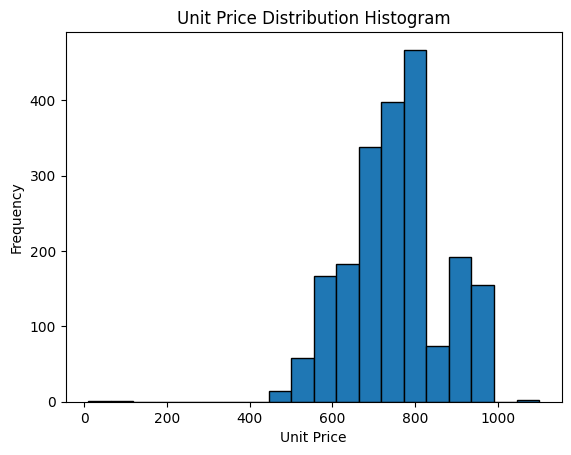

In [173]:
import matplotlib.pyplot as plt

plt.hist(smoked_salmon['unit_price'], bins=20, edgecolor='k')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Unit Price Distribution Histogram')
plt.show()


<ipython-input-174-5523e8a11693>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(smoked_salmon['unit_price'], shade=True)


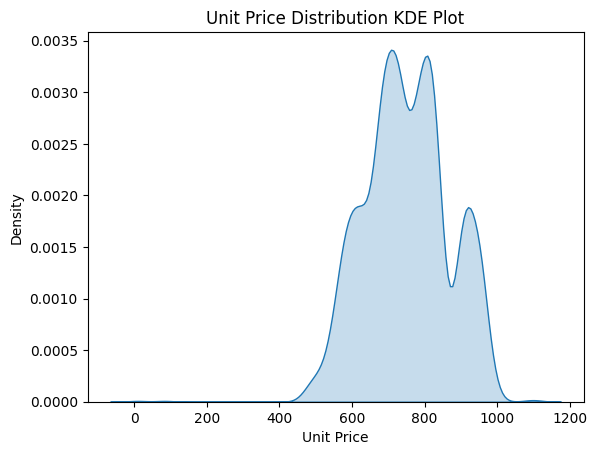

In [174]:
import seaborn as sns

sns.kdeplot(smoked_salmon['unit_price'], shade=True)
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.title('Unit Price Distribution KDE Plot')
plt.show()


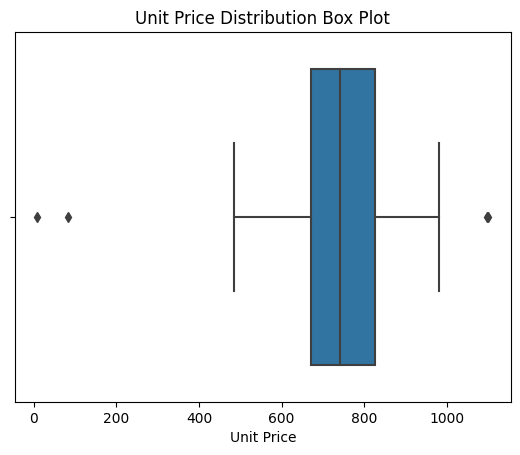

In [175]:
sns.boxplot(x=smoked_salmon['unit_price'])
plt.xlabel('Unit Price')
plt.title('Unit Price Distribution Box Plot')
plt.show()


In [176]:
mean_price = smoked_salmon['unit_price'].mean()
median_price = smoked_salmon['unit_price'].median()
std_price = smoked_salmon['unit_price'].std()
min_price = smoked_salmon['unit_price'].min()
max_price = smoked_salmon['unit_price'].max()

print("Mean:", mean_price)
print("Median:", median_price)
print("Standard Deviation:", std_price)
print("Min:", min_price)
print("Max:", max_price)


Mean: 750.6204343582235
Median: 740.0
Standard Deviation: 115.59963725527635
Min: 9.05
Max: 1100.0


In [132]:
smoked_salmon.head()

,total_qty,unit_price,total_purchase,day_of_week,month,quarter,year,item_desc_length,is_fresh_foods,is_dry_foods,is_seasoning_and_ingredient,is_frozen_food,is_chilled_and_dairy,is_fish_and_seafood,is_food_and_beverage_supplies,is_beverage,is_coffee_and_tea,is_preserved_food,is_frozen_fish,is_chilled_seafood,is_fish,is_frozen_seafood,is_sauce_and_condiment,is_canned_food,is_chilled_fish,is_kitchenware_and_utensils,is_wine,is_ready_to_eat_meal_,is_coffee,total_qty_bins,is_smoked_salmon_presliced,is_smoked_salmon_sliced,is_smoked_salmon,is_smoked_salmon_sliced_off_skin,is_smoked_salmon_unsliced,plant_AHLC,plant_BMQ,plant_BYSM,plant_BYTKB,plant_DTH,plant_HTBK,plant_LMB,plant_LMBK,plant_LMCM,plant_MHH,plant_MLCM,plant_MPHN,plant_MSBK,plant_MSM,plant_OPB,plant_SSMR,plant_VBL,unit_EA,unit_KG,unit_PK,supplier_beta foods express limited,supplier_black salmon international foods,supplier_c inter food chiangmai limited,supplier_champaca marketing limited,supplier_cti food supply,supplier_food quality limited,supplier_food way limited,supplier_jagota brothers trading,supplier_k.b. food services limited,supplier_kn meat supply krabi limited,supplier_krabi frozen food,supplier_millenium venture samui limited,supplier_nong tum pak sod limited,supplier_phuket union food,supplier_pks production limited partnership,supplier_siam food project,supplier_siam food services limited,supplier_siam makro public,supplier_sp thai press limited,supplier_thammachart seafood retail,supplier_unknown
0,1.20,770.0,924.0,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.32,770.0,1016.4,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.88,490.0,1411.2,2,5,2,2021,29,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2.57,530.0,1362.1,0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.38,530.0,1261.4,0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


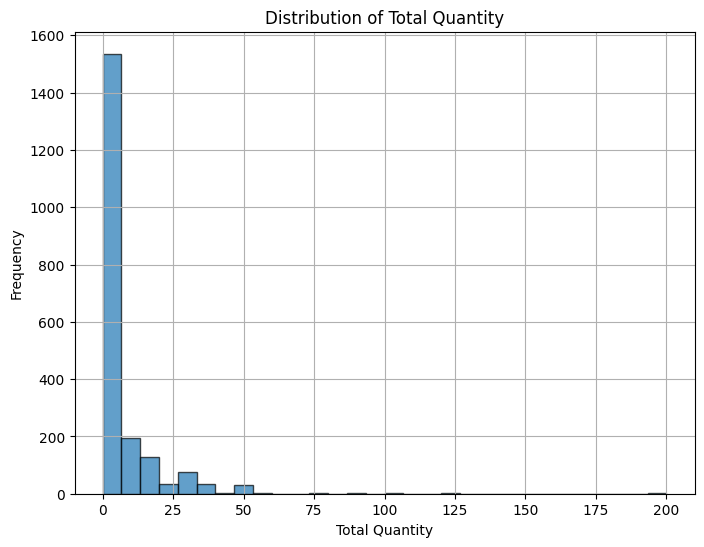

In [133]:
import matplotlib.pyplot as plt

#a histogram of the 'total_qty' feature
plt.figure(figsize=(8, 6))
plt.hist(smoked_salmon['total_qty'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Total Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Total Quantity')
plt.grid(True)
plt.show()


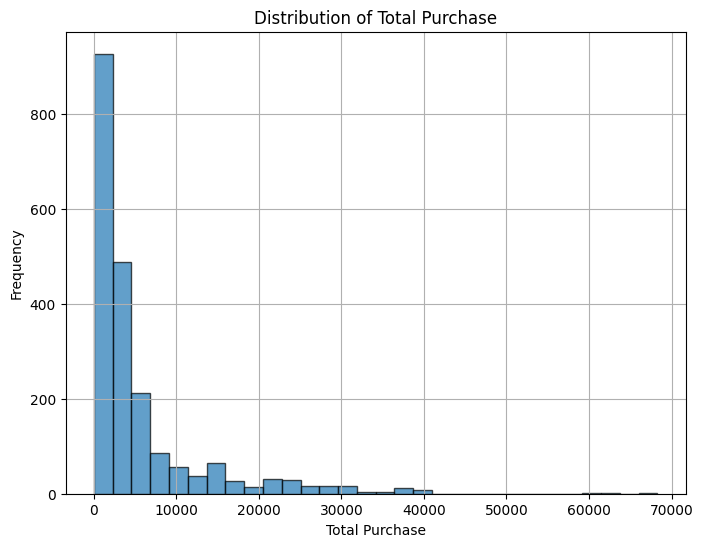

In [134]:
plt.figure(figsize=(8, 6))
plt.hist(smoked_salmon['total_purchase'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Total Purchase')
plt.ylabel('Frequency')
plt.title('Distribution of Total Purchase')
plt.grid(True)
plt.show()

<ipython-input-135-c1281d2abf5b>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(smoked_salmon['total_qty'], shade=True)


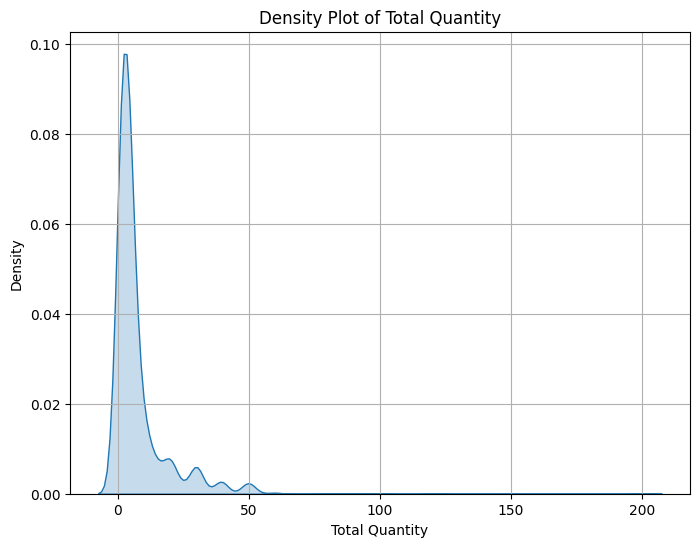

In [135]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.kdeplot(smoked_salmon['total_qty'], shade=True)
plt.xlabel('Total Quantity')
plt.ylabel('Density')
plt.title('Density Plot of Total Quantity')
plt.grid(True)
plt.show()

In [136]:
smoked_salmon['total_qty'].describe()

count    2049.000000
mean        7.556979
std        11.530027
min         0.010000
25%         1.620000
50%         3.580000
75%         6.740000
max       200.000000
Name: total_qty, dtype: float64

In [137]:
smoked_salmon['total_purchase'].describe()

count     2049.000000
mean      5517.765881
std       7602.765454
min          6.900000
25%       1237.500000
50%       2520.000000
75%       5430.000000
max      68292.400000
Name: total_purchase, dtype: float64

In [139]:
import numpy as np
#log transformation

smoked_salmon['total_qty_log'] = np.log1p(smoked_salmon['total_qty'])
smoked_salmon['total_purchase_log'] = np.log1p(smoked_salmon['total_purchase'])

In [140]:
smoked_salmon.head()

,total_qty,unit_price,total_purchase,day_of_week,month,quarter,year,item_desc_length,is_fresh_foods,is_dry_foods,is_seasoning_and_ingredient,is_frozen_food,is_chilled_and_dairy,is_fish_and_seafood,is_food_and_beverage_supplies,is_beverage,is_coffee_and_tea,is_preserved_food,is_frozen_fish,is_chilled_seafood,is_fish,is_frozen_seafood,is_sauce_and_condiment,is_canned_food,is_chilled_fish,is_kitchenware_and_utensils,is_wine,is_ready_to_eat_meal_,is_coffee,total_qty_bins,is_smoked_salmon_presliced,is_smoked_salmon_sliced,is_smoked_salmon,is_smoked_salmon_sliced_off_skin,is_smoked_salmon_unsliced,plant_AHLC,plant_BMQ,plant_BYSM,plant_BYTKB,plant_DTH,plant_HTBK,plant_LMB,plant_LMBK,plant_LMCM,plant_MHH,plant_MLCM,plant_MPHN,plant_MSBK,plant_MSM,plant_OPB,plant_SSMR,plant_VBL,unit_EA,unit_KG,unit_PK,supplier_beta foods express limited,supplier_black salmon international foods,supplier_c inter food chiangmai limited,supplier_champaca marketing limited,supplier_cti food supply,supplier_food quality limited,supplier_food way limited,supplier_jagota brothers trading,supplier_k.b. food services limited,supplier_kn meat supply krabi limited,supplier_krabi frozen food,supplier_millenium venture samui limited,supplier_nong tum pak sod limited,supplier_phuket union food,supplier_pks production limited partnership,supplier_siam food project,supplier_siam food services limited,supplier_siam makro public,supplier_sp thai press limited,supplier_thammachart seafood retail,supplier_unknown,total_qty_log,total_purchase_log
0,1.20,770.0,924.0,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.788457,6.829794
1,1.32,770.0,1016.4,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.841567,6.925006
2,2.88,490.0,1411.2,2,5,2,2021,29,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.355835,7.252904
3,2.57,530.0,1362.1,0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.272566,7.217517
4,2.38,530.0,1261.4,0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.217876,7.140770


<ipython-input-141-5ac0dbe6aab1>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(smoked_salmon['total_qty_log'], shade=True, ax=axes[0])
<ipython-input-141-5ac0dbe6aab1>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(smoked_salmon['total_purchase_log'], shade=True, ax=axes[1])


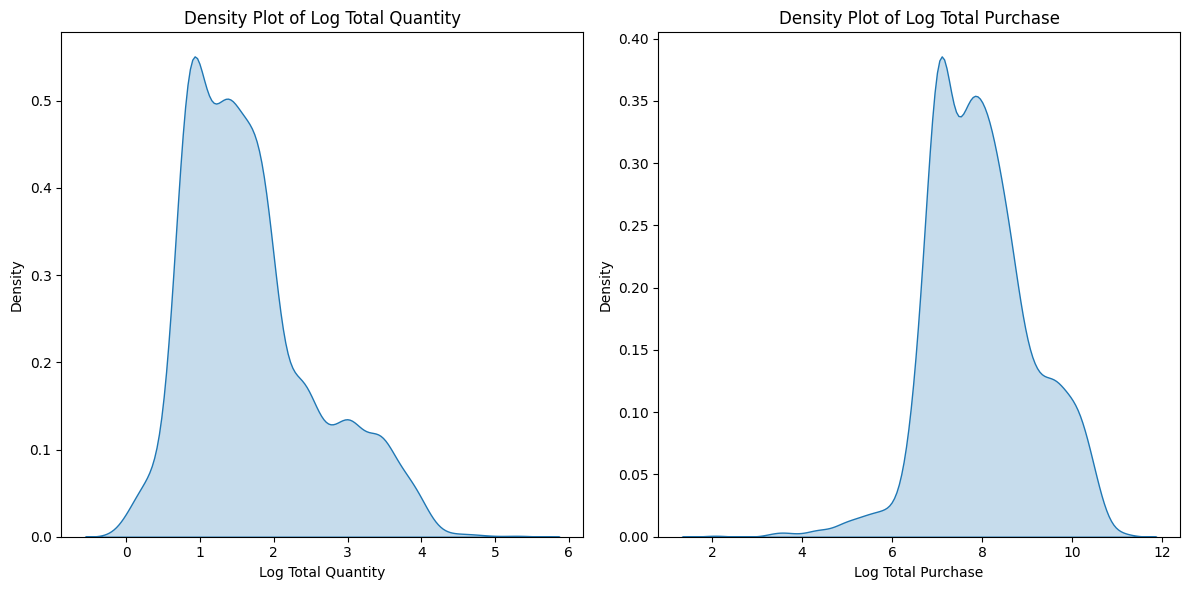

In [141]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.kdeplot(smoked_salmon['total_qty_log'], shade=True, ax=axes[0])
axes[0].set_xlabel('Log Total Quantity')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot of Log Total Quantity')

sns.kdeplot(smoked_salmon['total_purchase_log'], shade=True, ax=axes[1])
axes[1].set_xlabel('Log Total Purchase')
axes[1].set_ylabel('Density')
axes[1].set_title('Density Plot of Log Total Purchase')

plt.tight_layout()
plt.show()

In [142]:
smoked_salmon.head()

,total_qty,unit_price,total_purchase,day_of_week,month,quarter,year,item_desc_length,is_fresh_foods,is_dry_foods,is_seasoning_and_ingredient,is_frozen_food,is_chilled_and_dairy,is_fish_and_seafood,is_food_and_beverage_supplies,is_beverage,is_coffee_and_tea,is_preserved_food,is_frozen_fish,is_chilled_seafood,is_fish,is_frozen_seafood,is_sauce_and_condiment,is_canned_food,is_chilled_fish,is_kitchenware_and_utensils,is_wine,is_ready_to_eat_meal_,is_coffee,total_qty_bins,is_smoked_salmon_presliced,is_smoked_salmon_sliced,is_smoked_salmon,is_smoked_salmon_sliced_off_skin,is_smoked_salmon_unsliced,plant_AHLC,plant_BMQ,plant_BYSM,plant_BYTKB,plant_DTH,plant_HTBK,plant_LMB,plant_LMBK,plant_LMCM,plant_MHH,plant_MLCM,plant_MPHN,plant_MSBK,plant_MSM,plant_OPB,plant_SSMR,plant_VBL,unit_EA,unit_KG,unit_PK,supplier_beta foods express limited,supplier_black salmon international foods,supplier_c inter food chiangmai limited,supplier_champaca marketing limited,supplier_cti food supply,supplier_food quality limited,supplier_food way limited,supplier_jagota brothers trading,supplier_k.b. food services limited,supplier_kn meat supply krabi limited,supplier_krabi frozen food,supplier_millenium venture samui limited,supplier_nong tum pak sod limited,supplier_phuket union food,supplier_pks production limited partnership,supplier_siam food project,supplier_siam food services limited,supplier_siam makro public,supplier_sp thai press limited,supplier_thammachart seafood retail,supplier_unknown,total_qty_log,total_purchase_log
0,1.20,770.0,924.0,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.788457,6.829794
1,1.32,770.0,1016.4,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.841567,6.925006
2,2.88,490.0,1411.2,2,5,2,2021,29,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.355835,7.252904
3,2.57,530.0,1362.1,0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.272566,7.217517
4,2.38,530.0,1261.4,0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1-5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.217876,7.140770


In [143]:
smoked_salmon.drop(columns=['total_qty', 'total_purchase'], inplace=True)

In [148]:
smoked_salmon.drop(columns=['total_qty_bins'], inplace=True)

In [149]:
smoked_salmon.head()

,unit_price,day_of_week,month,quarter,year,item_desc_length,is_fresh_foods,is_dry_foods,is_seasoning_and_ingredient,is_frozen_food,is_chilled_and_dairy,is_fish_and_seafood,is_food_and_beverage_supplies,is_beverage,is_coffee_and_tea,is_preserved_food,is_frozen_fish,is_chilled_seafood,is_fish,is_frozen_seafood,is_sauce_and_condiment,is_canned_food,is_chilled_fish,is_kitchenware_and_utensils,is_wine,is_ready_to_eat_meal_,is_coffee,is_smoked_salmon_presliced,is_smoked_salmon_sliced,is_smoked_salmon,is_smoked_salmon_sliced_off_skin,is_smoked_salmon_unsliced,plant_AHLC,plant_BMQ,plant_BYSM,plant_BYTKB,plant_DTH,plant_HTBK,plant_LMB,plant_LMBK,plant_LMCM,plant_MHH,plant_MLCM,plant_MPHN,plant_MSBK,plant_MSM,plant_OPB,plant_SSMR,plant_VBL,unit_EA,unit_KG,unit_PK,supplier_beta foods express limited,supplier_black salmon international foods,supplier_c inter food chiangmai limited,supplier_champaca marketing limited,supplier_cti food supply,supplier_food quality limited,supplier_food way limited,supplier_jagota brothers trading,supplier_k.b. food services limited,supplier_kn meat supply krabi limited,supplier_krabi frozen food,supplier_millenium venture samui limited,supplier_nong tum pak sod limited,supplier_phuket union food,supplier_pks production limited partnership,supplier_siam food project,supplier_siam food services limited,supplier_siam makro public,supplier_sp thai press limited,supplier_thammachart seafood retail,supplier_unknown,total_qty_log,total_purchase_log
0,770.0,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.788457,6.829794
1,770.0,2,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.841567,6.925006
2,490.0,2,5,2,2021,29,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.355835,7.252904
3,530.0,0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.272566,7.217517
4,530.0,0,5,2,2021,55,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.217876,7.140770


In [150]:
smoked_salmon_df=smoked_salmon

### ML for Salmon price prediction
1. based on category in Rev_Cate_Level_4 "smoked_salmon" for each month
2. model validation

In [151]:
from sklearn.model_selection import train_test_split

X = smoked_salmon_df.drop(columns=['unit_price'])  # Features
y = smoked_salmon_df['unit_price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [152]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [153]:
from sklearn.metrics import mean_squared_error

y_pred= model.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)

In [155]:
# Print y_pred, mse, and rmse
#print("y_pred:", y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1576.2894429510122
Root Mean Squared Error (RMSE): 39.70251179649736


In [156]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# RMSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Regression RMSE:", rmse_rf)


Random Forest Regression RMSE: 25.506626150366994


In [157]:
from sklearn.ensemble import GradientBoostingRegressor

# create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# fit the model to the training data
gb_model.fit(X_train, y_train)

# make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# calculate RMSE
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("Gradient Boosting Regression RMSE:", rmse_gb)


Gradient Boosting Regression RMSE: 34.06838877198341


In [158]:
from xgboost import XGBRegressor

# create an XGBoost Regression model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# fit the model to the training data
xgb_model.fit(X_train, y_train)

# make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# RMSE
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGBoost Regression RMSE:", rmse_xgb)


XGBoost Regression RMSE: 24.895124353227132


In [159]:
from lightgbm import LGBMRegressor

# create a LightGBM Regression model
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# fit the model to the training data
lgb_model.fit(X_train, y_train)

# make predictions on the test data
y_pred_lgb = lgb_model.predict(X_test)

#  RMSE
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)

print("LightGBM Regression RMSE:", rmse_lgb)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 1639, number of used features: 37
[LightGBM] [Info] Start training from score 750.234057
LightGBM Regression RMSE: 25.82038616456287


In [161]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 15.3 MB/s eta 0:00:00


In [162]:
from catboost import CatBoostRegressor

# create a CatBoost Regression model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, random_seed=42)

# fit the model to the training data
catboost_model.fit(X_train, y_train)

# make predictions on the test data
y_pred_catboost = catboost_model.predict(X_test)

#  RMSE
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)

print("CatBoost Regression RMSE:", rmse_catboost)


0:	learn: 108.9345511	total: 48.9ms	remaining: 4.84s
1:	learn: 102.8444590	total: 50.6ms	remaining: 2.48s
2:	learn: 96.5206312	total: 52.2ms	remaining: 1.69s
3:	learn: 91.0729854	total: 54.1ms	remaining: 1.3s
4:	learn: 85.9823091	total: 56.5ms	remaining: 1.07s
5:	learn: 81.3745418	total: 58.5ms	remaining: 917ms
6:	learn: 77.6203841	total: 60.6ms	remaining: 805ms
7:	learn: 74.2170682	total: 62.4ms	remaining: 718ms
8:	learn: 71.5655835	total: 64.3ms	remaining: 651ms
9:	learn: 68.8557078	total: 66.4ms	remaining: 597ms
10:	learn: 66.2358866	total: 68.4ms	remaining: 553ms
11:	learn: 63.9054160	total: 69.7ms	remaining: 511ms
12:	learn: 61.7952343	total: 70.9ms	remaining: 474ms
13:	learn: 59.9070247	total: 72.5ms	remaining: 445ms
14:	learn: 58.3357925	total: 73.9ms	remaining: 419ms
15:	learn: 56.6679845	total: 75.1ms	remaining: 394ms
16:	learn: 55.2172214	total: 76.5ms	remaining: 374ms
17:	learn: 54.0101788	total: 78.2ms	remaining: 356ms
18:	learn: 52.9110614	total: 80ms	remaining: 341ms
19:	

In [163]:
from sklearn.svm import SVR

# create an SVR model
svr_model = SVR(kernel='rbf')

# fit the model to the training data
svr_model.fit(X_train, y_train)

# make predictions on the test data
y_pred_svr = svr_model.predict(X_test)

#  RMSE
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

print("Support Vector Regression RMSE:", rmse_svr)


Support Vector Regression RMSE: 112.10664579609275


In [164]:
from sklearn.linear_model import Ridge

# create a Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# fit the model to the training data
ridge_model.fit(X_train, y_train)

# make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)

#  RMSE
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge Regression RMSE:", rmse_ridge)


Ridge Regression RMSE: 41.11429004207257


In [165]:
from sklearn.linear_model import Lasso

# create a Lasso Regression model
lasso_model = Lasso(alpha=1.0)

# fit the model to the training data
lasso_model.fit(X_train, y_train)

# make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)

#  RMSE
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso Regression RMSE:", rmse_lasso)

Lasso Regression RMSE: 45.64853084711638


In [166]:
from sklearn.linear_model import ElasticNet

# create an Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# fit the model to the training data
elastic_net_model.fit(X_train, y_train)

# make predictions on the test data
y_pred_elastic_net = elastic_net_model.predict(X_test)

#  RMSE
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
rmse_elastic_net = np.sqrt(mse_elastic_net)

print("Elastic Net Regression RMSE:", rmse_elastic_net)


Elastic Net Regression RMSE: 73.89072098196604


In [167]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from catboost import CatBoostRegressor


# Create models
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ("XGBoost", XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ("LightGBM", LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ("Support Vector (SVR)", SVR(kernel='rbf')),
    ("Ridge Regression", Ridge(alpha=1.0)),
    ("Lasso Regression", Lasso(alpha=1.0)),
    ("Elastic Net Regression", ElasticNet(alpha=1.0, l1_ratio=0.5)),
    ("CatBoost", CatBoostRegressor(iterations=100, learning_rate=0.1, random_seed=42, verbose=0))
]


results_df = pd.DataFrame(columns=["Model", "RMSE"])


for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results_df = results_df.append({"Model": model_name, "RMSE": rmse}, ignore_index=True)

# Print the DataFrame
print(results_df)


<ipython-input-167-464a3505382e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": model_name, "RMSE": rmse}, ignore_index=True)
<ipython-input-167-464a3505382e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": model_name, "RMSE": rmse}, ignore_index=True)
<ipython-input-167-464a3505382e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": model_name, "RMSE": rmse}, ignore_index=True)
<ipython-input-167-464a3505382e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": model_name

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 1639, number of used features: 37
[LightGBM] [Info] Start training from score 750.234057


<ipython-input-167-464a3505382e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": model_name, "RMSE": rmse}, ignore_index=True)
<ipython-input-167-464a3505382e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": model_name, "RMSE": rmse}, ignore_index=True)
<ipython-input-167-464a3505382e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": model_name, "RMSE": rmse}, ignore_index=True)
<ipython-input-167-464a3505382e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": model_name

                    Model        RMSE
0       Linear Regression   39.702512
1           Random Forest   25.506626
2       Gradient Boosting   34.068389
3                 XGBoost   24.895124
4                LightGBM   25.820386
5    Support Vector (SVR)  112.106646
6        Ridge Regression   41.114290
7        Lasso Regression   45.648531
8  Elastic Net Regression   73.890721
9                CatBoost   33.570071


<ipython-input-167-464a3505382e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": model_name, "RMSE": rmse}, ignore_index=True)


In [168]:
# sort by RMSE in ascending order
sorted_results_df = results_df.sort_values(by='RMSE')

# the top 3 models
top_3_models = sorted_results_df.head(3)
print("Top 3 Models:")
print(top_3_models)

Top 3 Models:
           Model       RMSE
3        XGBoost  24.895124
1  Random Forest  25.506626
4       LightGBM  25.820386


# Feature Importance

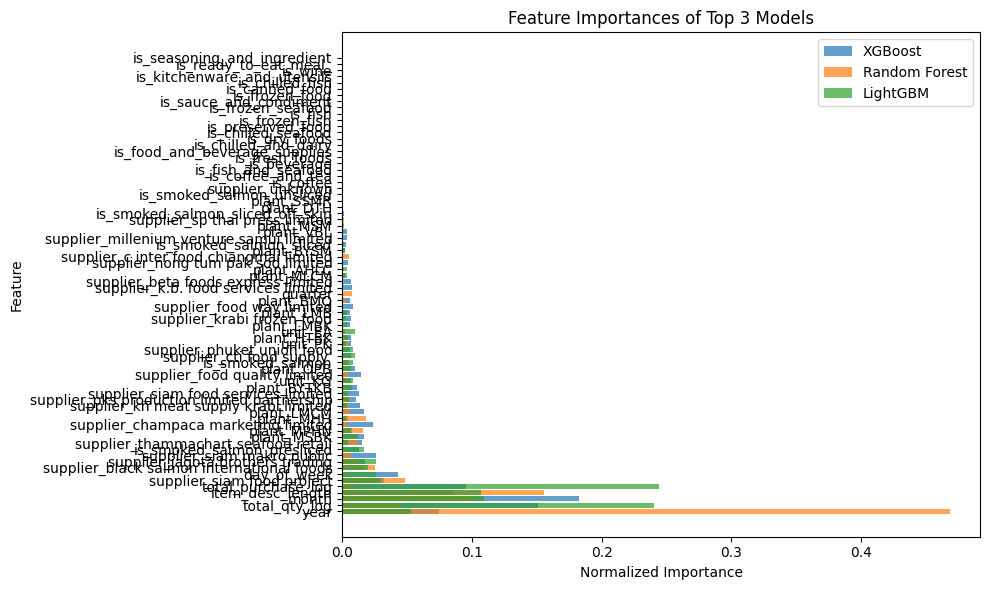

In [169]:
import matplotlib.pyplot as plt


# get feature importances from the top 3 models
feature_importances_xgb = xgb_model.get_booster().get_score(importance_type='weight')
feature_importances_rf = rf_model.feature_importances_
feature_importances_lgb = lgb_model.feature_importances_

# dataframe for feature importances
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'XGBoost': [feature_importances_xgb.get(feature, 0) for feature in X_train.columns],
    'Random Forest': feature_importances_rf,
    'LightGBM': feature_importances_lgb
})

# normalize importance scores for better visualization
importances_df['XGBoost'] = importances_df['XGBoost'] / importances_df['XGBoost'].sum()
importances_df['Random Forest'] = importances_df['Random Forest'] / importances_df['Random Forest'].sum()
importances_df['LightGBM'] = importances_df['LightGBM'] / importances_df['LightGBM'].sum()

# sort by the mean importance across models
importances_df['Mean Importance'] = importances_df[['XGBoost', 'Random Forest', 'LightGBM']].mean(axis=1)
importances_df = importances_df.sort_values(by='Mean Importance', ascending=False)

# plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['XGBoost'], label='XGBoost', alpha=0.7)
plt.barh(importances_df['Feature'], importances_df['Random Forest'], label='Random Forest', alpha=0.7)
plt.barh(importances_df['Feature'], importances_df['LightGBM'], label='LightGBM', alpha=0.7)
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Top 3 Models')
plt.legend()
plt.tight_layout()
plt.show()


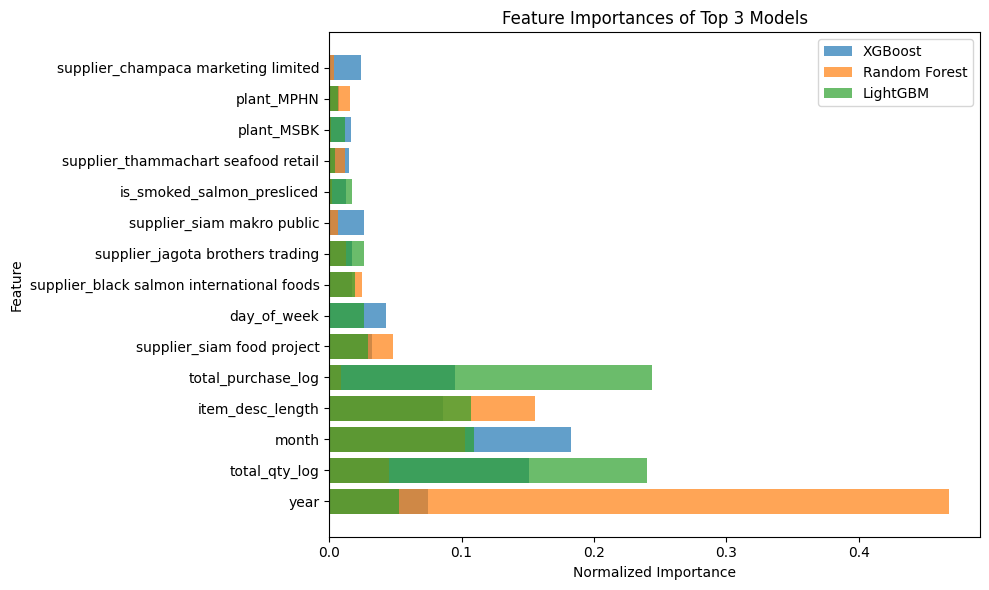

In [170]:
import matplotlib.pyplot as plt


# get feature importances from the top 3 models
feature_importances_xgb = xgb_model.get_booster().get_score(importance_type='weight')
feature_importances_rf = rf_model.feature_importances_
feature_importances_lgb = lgb_model.feature_importances_

# dataframe
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'XGBoost': [feature_importances_xgb.get(feature, 0) for feature in X_train.columns],
    'Random Forest': feature_importances_rf,
    'LightGBM': feature_importances_lgb
})

# normalize importance scores for better visualization
importances_df['XGBoost'] = importances_df['XGBoost'] / importances_df['XGBoost'].sum()
importances_df['Random Forest'] = importances_df['Random Forest'] / importances_df['Random Forest'].sum()
importances_df['LightGBM'] = importances_df['LightGBM'] / importances_df['LightGBM'].sum()

# sort by the mean importance across models
importances_df['Mean Importance'] = importances_df[['XGBoost', 'Random Forest', 'LightGBM']].mean(axis=1)
importances_df = importances_df.sort_values(by='Mean Importance', ascending=False)

# plot feature importances
plt.figure(figsize=(10, 6))

top_n = 15  # top 15 features
plt.barh(importances_df['Feature'][:top_n], importances_df['XGBoost'][:top_n], label='XGBoost', alpha=0.7)
plt.barh(importances_df['Feature'][:top_n], importances_df['Random Forest'][:top_n], label='Random Forest', alpha=0.7)
plt.barh(importances_df['Feature'][:top_n], importances_df['LightGBM'][:top_n], label='LightGBM', alpha=0.7)

plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Top 3 Models')
plt.legend()
plt.tight_layout()

# rotate y-axis labels to horizontal
plt.yticks(rotation=0)

plt.show()


In [171]:
# get the top 15 most important features from importances_df
top_15_features = importances_df['Feature'][:15].tolist()

# Create new datasets with top 15 features
X_train_top15 = X_train[top_15_features]
X_test_top15 = X_test[top_15_features]

# train the top 3 models on the new datasets

# train XGBoost
xgb_model_top15 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model_top15.fit(X_train_top15, y_train)

# train Random Forest
rf_model_top15 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_top15.fit(X_train_top15, y_train)

# train LightGBM
lgb_model_top15 = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model_top15.fit(X_train_top15, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 1639, number of used features: 13
[LightGBM] [Info] Start training from score 750.234057


LGBMRegressor(random_state=42)

In [172]:
# predict using the top 3 models with top 15 features
y_pred_xgb_top15 = xgb_model_top15.predict(X_test_top15)
y_pred_rf_top15 = rf_model_top15.predict(X_test_top15)
y_pred_lgb_top15 = lgb_model_top15.predict(X_test_top15)

# calculate RMSE for each model
rmse_xgb_top15 = np.sqrt(mean_squared_error(y_test, y_pred_xgb_top15))
rmse_rf_top15 = np.sqrt(mean_squared_error(y_test, y_pred_rf_top15))
rmse_lgb_top15 = np.sqrt(mean_squared_error(y_test, y_pred_lgb_top15))

# print RMSE values
print("XGBoost RMSE (Top 15 features):", rmse_xgb_top15)
print("Random Forest RMSE (Top 15 features):", rmse_rf_top15)
print("LightGBM RMSE (Top 15 features):", rmse_lgb_top15)


XGBoost RMSE (Top 15 features): 23.96606494596142
Random Forest RMSE (Top 15 features): 25.03067244443281
LightGBM RMSE (Top 15 features): 25.81649195706277


In [177]:
mean_price = smoked_salmon['unit_price'].mean()
median_price = smoked_salmon['unit_price'].median()
std_price = smoked_salmon['unit_price'].std()
min_price = smoked_salmon['unit_price'].min()
max_price = smoked_salmon['unit_price'].max()

print("Mean:", mean_price)
print("Median:", median_price)
print("Standard Deviation:", std_price)
print("Min:", min_price)
print("Max:", max_price)


Mean: 750.6204343582235
Median: 740.0
Standard Deviation: 115.59963725527635
Min: 9.05
Max: 1100.0


In [178]:
1100-9.05

1090.95

In [179]:
target_min= smoked_salmon_df['unit_price'].min()
target_max= smoked_salmon_df['unit_price'].max()

target_range= target_max- target_min
print("Target Variable Range:", target_range)

Target Variable Range: 1090.95


In [180]:
y_pred = xgb_model_top15.predict(X_test_top15)   # calculate residuals
residuals = y_test - y_pred

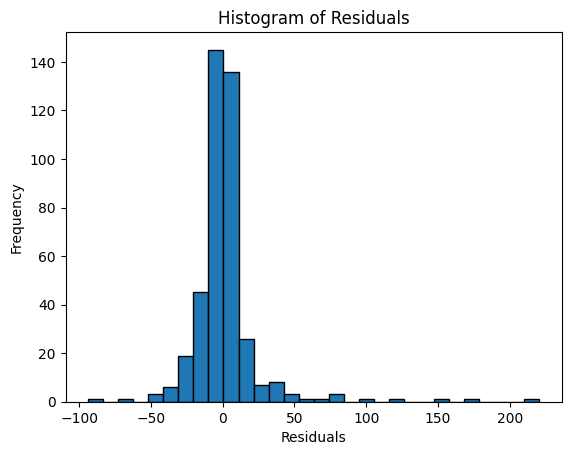

In [181]:
import matplotlib.pyplot as plt

plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

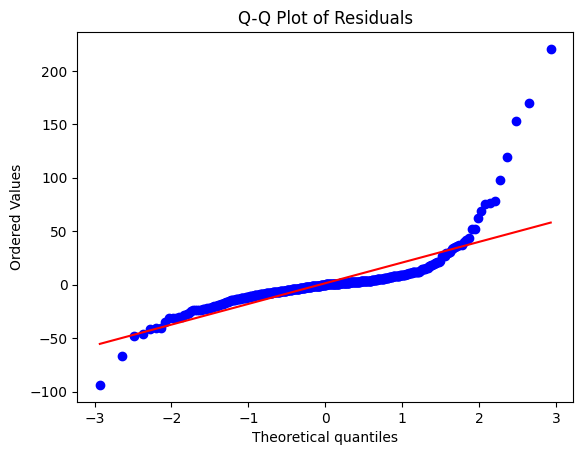

In [182]:
#Q-Q plot compare the quantiles of residuals with quantile theoretical normal distr.
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [183]:
from sklearn.metrics import mean_absolute_error

mae_xgb = mean_absolute_error(y_test, y_pred_xgb_top15)
mae_rf = mean_absolute_error(y_test, y_pred_rf_top15)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb_top15)

print("XGBoost MAE (Top 15 features):", mae_xgb)
print("Random Forest MAE (Top 15 features):", mae_rf)
print("LightGBM MAE (Top 15 features):", mae_lgb)


XGBoost MAE (Top 15 features): 11.977685785060975
Random Forest MAE (Top 15 features): 7.732359024390248
LightGBM MAE (Top 15 features): 13.942043720800235


In [184]:
from sklearn.metrics import r2_score

r2_xgb = r2_score(y_test, y_pred_xgb_top15)
r2_rf = r2_score(y_test, y_pred_rf_top15)
r2_lgb = r2_score(y_test, y_pred_lgb_top15)

print("XGBoost R-squared (Top 15 features):", r2_xgb)
print("Random Forest R-squared (Top 15 features):", r2_rf)
print("LightGBM R-squared (Top 15 features):", r2_lgb)


XGBoost R-squared (Top 15 features): 0.9538160642758994
Random Forest R-squared (Top 15 features): 0.9496218157639399
LightGBM R-squared (Top 15 features): 0.9464089911122525


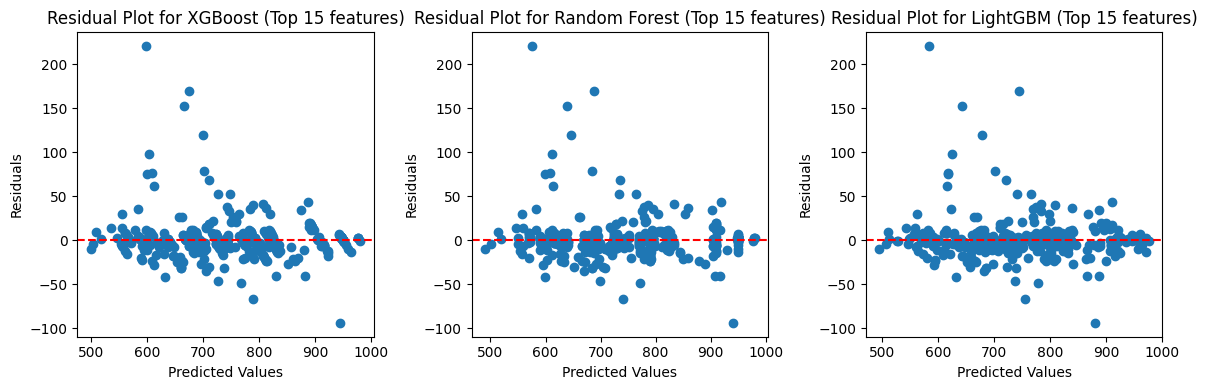

In [185]:
plt.figure(figsize=(12, 4))

# XGBoost Residual Plot
plt.subplot(1, 3, 1)
plt.scatter(y_pred_xgb_top15, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for XGBoost (Top 15 features)')
plt.axhline(y=0, color='r', linestyle='--')

# Random Forest Residual Plot
plt.subplot(1, 3, 2)
plt.scatter(y_pred_rf_top15, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest (Top 15 features)')
plt.axhline(y=0, color='r', linestyle='--')

# LightGBM Residual Plot
plt.subplot(1, 3, 3)
plt.scatter(y_pred_lgb_top15, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for LightGBM (Top 15 features)')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()


# Univariate Analysis (UA)

In [ ]:
# check categorical columns
print('Categorical columns are :' ,input_df.select_dtypes(include=['object']).columns.to_list()) # print with list


# check numerical columns
print('Numerical columns are:', input_df.select_dtypes(include=['int64','float64']).columns.tolist()) # print with list

Categorical columns are : ['plant_name', 'po_number', 'rev_cate_level_1', 'rev_cate_level_2', 'rev_cate_level_3', 'rev_cate_level_4', 'rev_cate_level_5', 'item_desc', 'unit', 'generalized_supplier_name']
Numerical columns are: ['total_qty', 'unit_price', 'total_purchase']


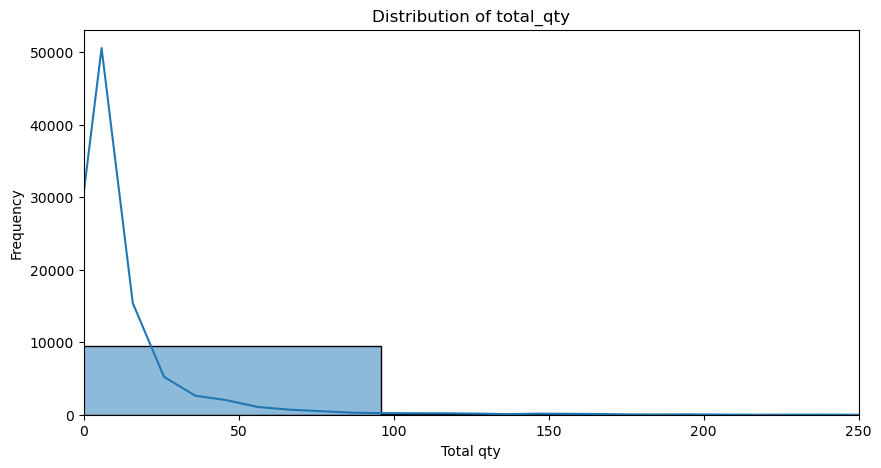

In [ ]:
plt.figure(figsize=(10,5)) # set the figure size
sns.histplot(input_df['total_qty'], bins=20, kde=True) # plot the histogram of total_qty column
plt.title('Distribution of total_qty') # set the title of the plot
plt.xlabel('Total qty') # set the x label of the plot
plt.ylabel('Frequency')
plt.xlim(0,250)
plt.show() # show the plot

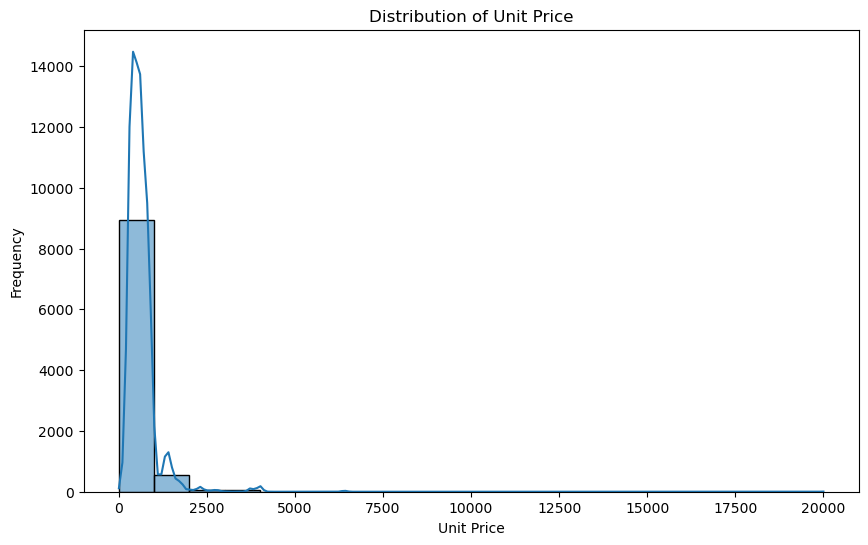

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(input_df['unit_price'], bins=20, kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

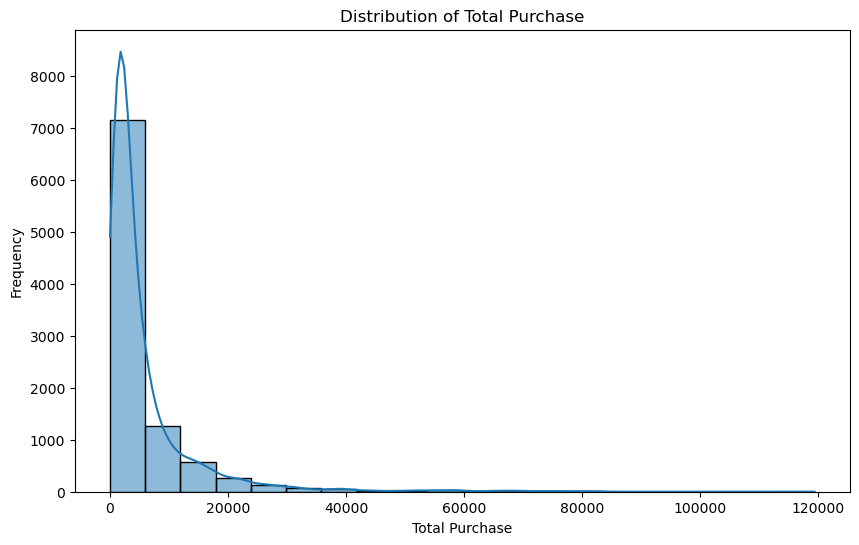

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(input_df['total_purchase'], bins=20, kde=True)
plt.title('Distribution of Total Purchase')
plt.xlabel('Total Purchase')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


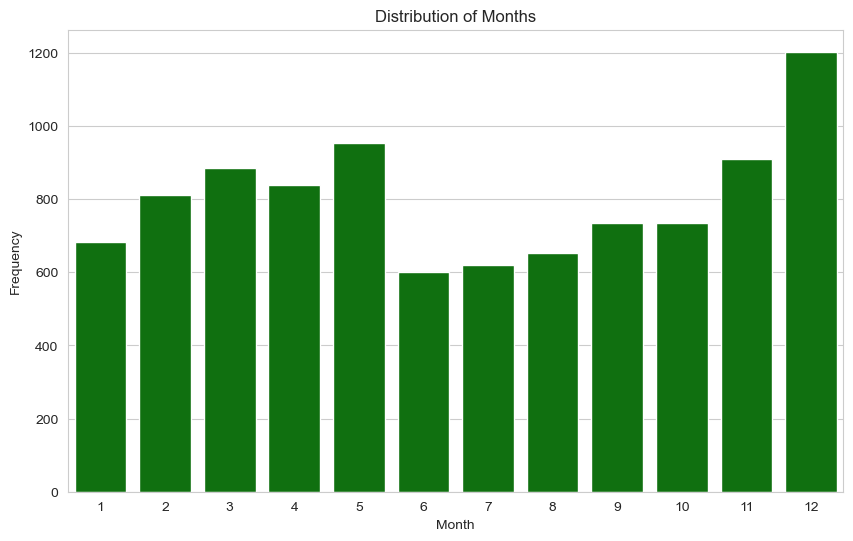

In [ ]:
# Univariate Analysis for 'month'
sns.set_style('whitegrid')  # set the style of the plot
plt.figure(figsize=(10, 6))
sns.countplot(input_df['month'], color='green')
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show();

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


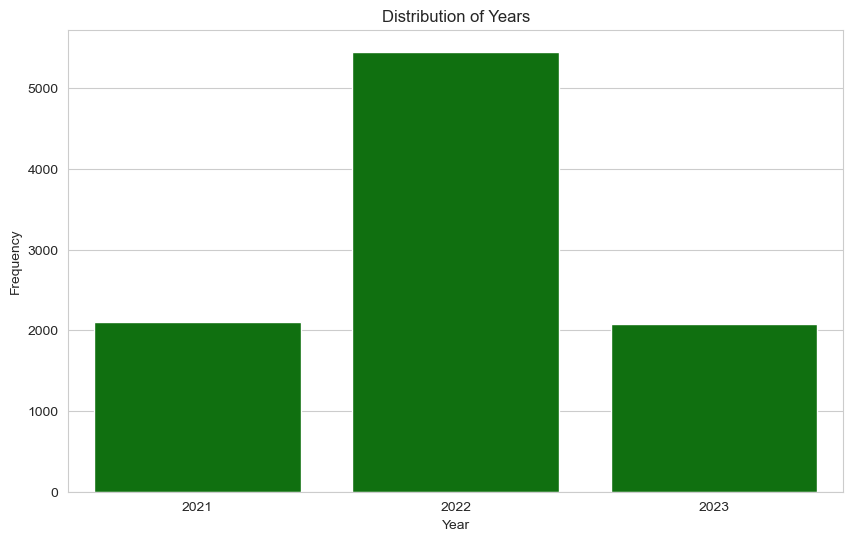

In [ ]:
# Univariate Analysis for 'year'
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(input_df['year'], color='green')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show();

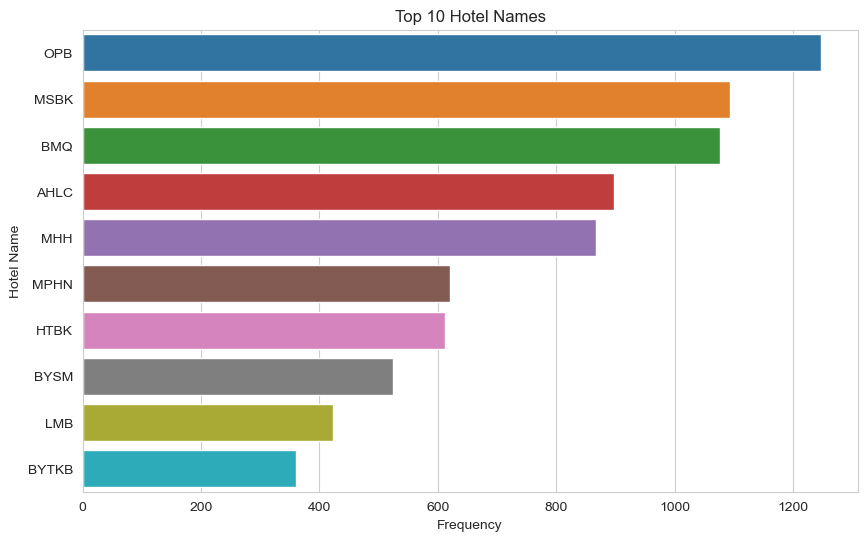

In [ ]:
# Univariate Analysis for 'plant_name'
plt.figure(figsize=(10, 6))
sns.countplot(y=input_df['plant_name'], order=input_df['plant_name'].value_counts().index[:10])
plt.title('Top 10 Hotel Names')
plt.xlabel('Frequency')
plt.ylabel('Hotel Name')
plt.show();

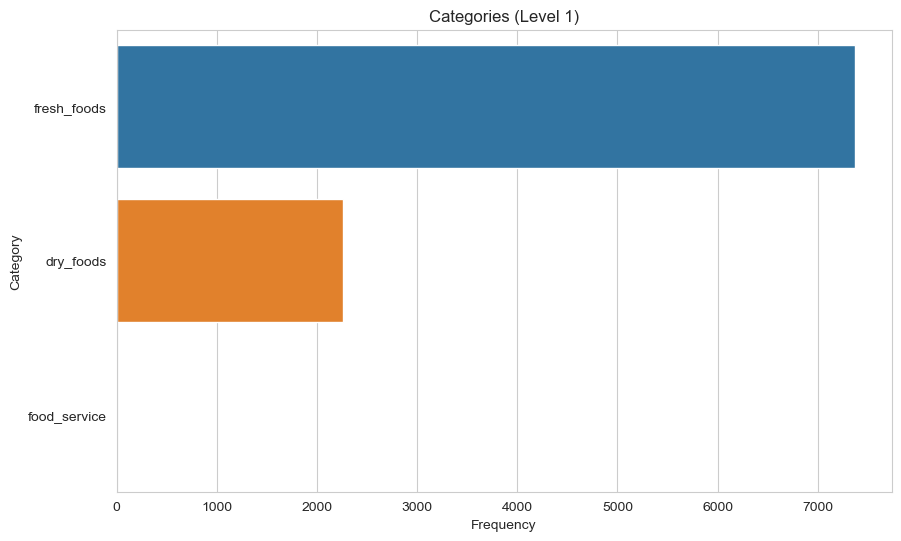

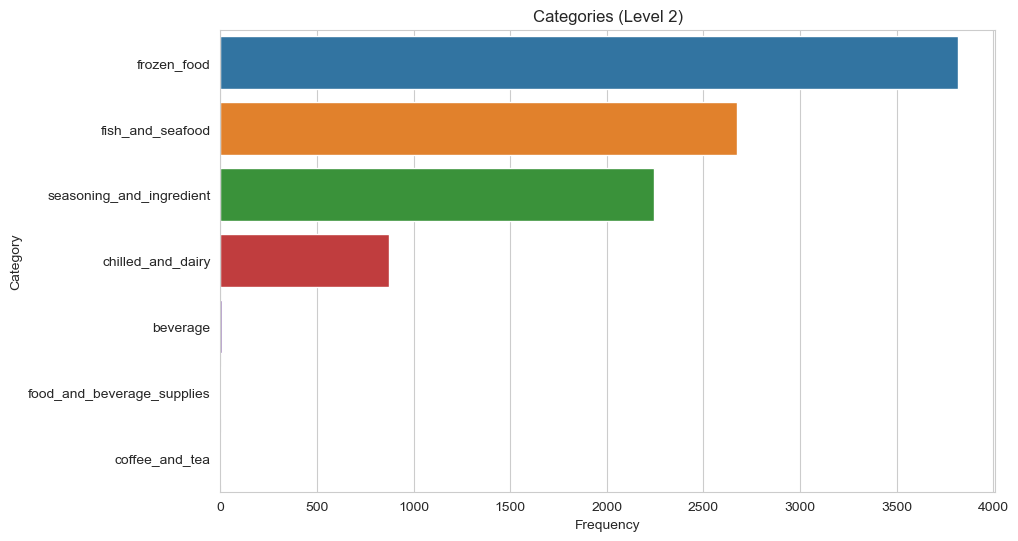

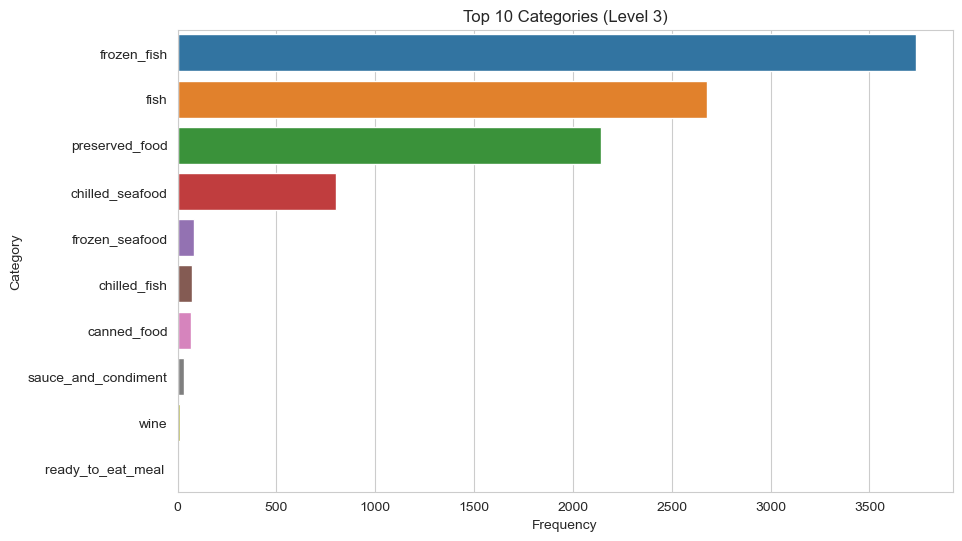

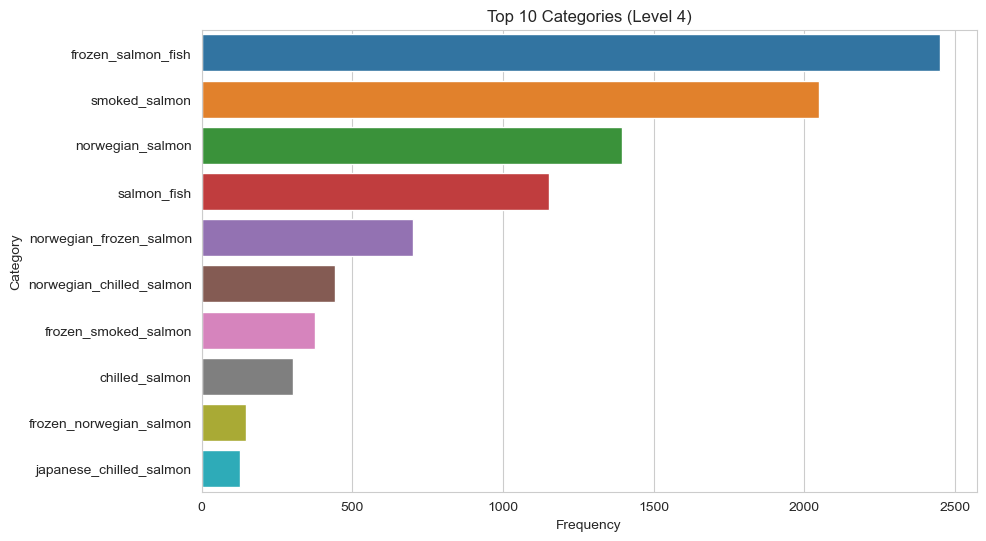

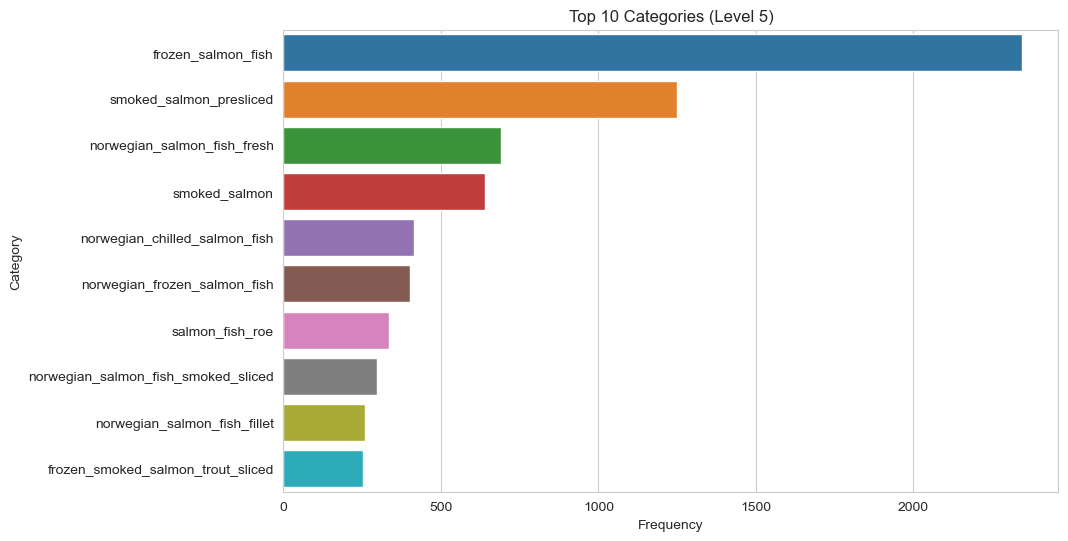

In [ ]:
# Univariate Analysis for 'rev_cate_level_1'
plt.figure(figsize=(10, 6))
sns.countplot(y=input_df['rev_cate_level_1'], order=input_df['rev_cate_level_1'].value_counts().index[:10])
plt.title('Categories (Level 1)')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

# Univariate Analysis for 'rev_cate_level_2'
plt.figure(figsize=(10, 6))
sns.countplot(y=input_df['rev_cate_level_2'], order=input_df['rev_cate_level_2'].value_counts().index[:10])
plt.title('Categories (Level 2)')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

# Univariate Analysis for 'rev_cate_level_3'
plt.figure(figsize=(10, 6))
sns.countplot(y=input_df['rev_cate_level_3'], order=input_df['rev_cate_level_3'].value_counts().index[:10])
plt.title('Top 10 Categories (Level 3)')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

# Univariate Analysis for 'rev_cate_level_4'
plt.figure(figsize=(10, 6))
sns.countplot(y=input_df['rev_cate_level_4'], order=input_df['rev_cate_level_4'].value_counts().index[:10])
plt.title('Top 10 Categories (Level 4)')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

# Univariate Analysis for 'rev_cate_level_5'
plt.figure(figsize=(10, 6))
sns.countplot(y=input_df['rev_cate_level_5'], order=input_df['rev_cate_level_5'].value_counts().index[:10])
plt.title('Top 10 Categories (Level 5)')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()


In [ ]:
input_df.columns

Index(['plant_name', 'po_number', 'rev_cate_level_1', 'rev_cate_level_2',
       'rev_cate_level_3', 'rev_cate_level_4', 'rev_cate_level_5', 'item_desc',
       'total_qty', 'unit', 'unit_price', 'total_purchase',
       'generalized_supplier_name', 'month', 'year'],
      dtype='object')

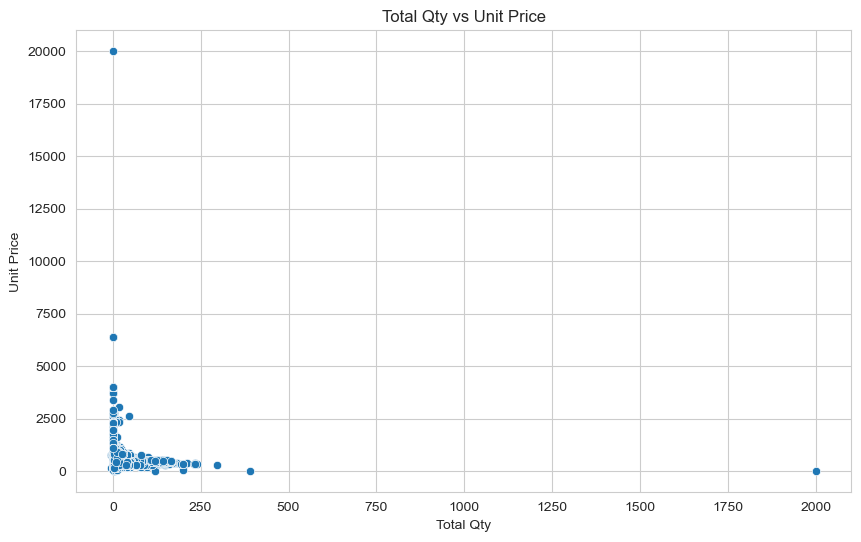

In [ ]:
# bi-variate analysis for 'total_qty' and 'total_purchase'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_qty', y='unit_price', data=input_df)
plt.title('Total Qty vs Unit Price')
plt.xlabel('Total Qty')
plt.ylabel('Unit Price')
plt.show()

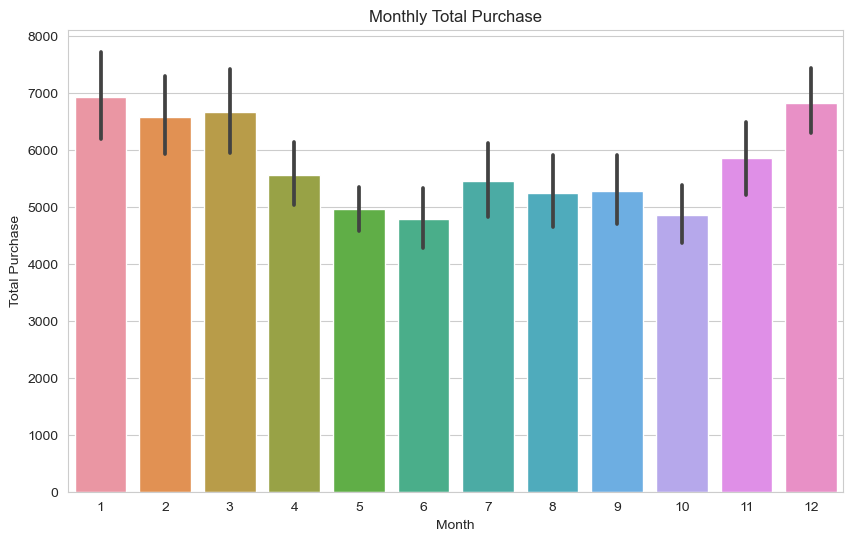

In [ ]:
# bi-variate analysis for 'month' and 'total_purchase'
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_purchase', data=input_df)
plt.title('Monthly Total Purchase')
plt.xlabel('Month')
plt.ylabel('Total Purchase')
plt.show()

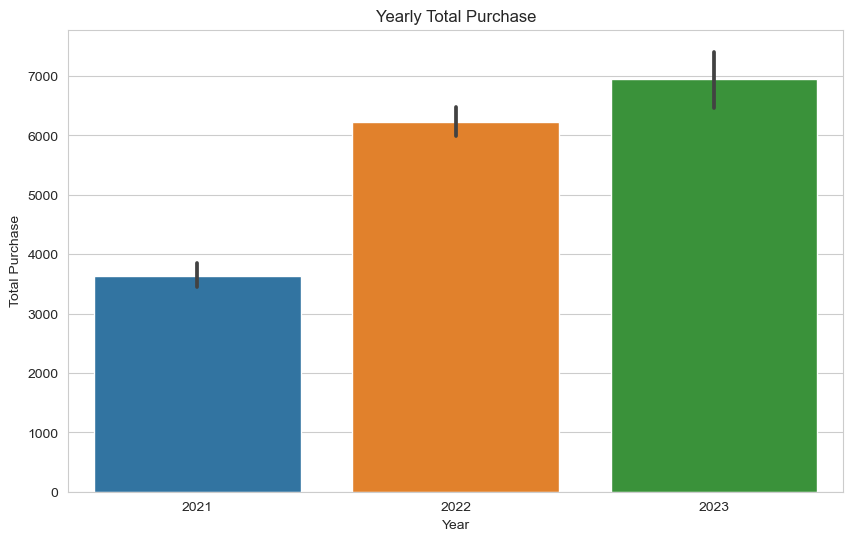

In [ ]:
# bi-variate analysis for 'year' and 'total_purchase'
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='total_purchase', data=input_df)
plt.title('Yearly Total Purchase')
plt.xlabel('Year')
plt.ylabel('Total Purchase')
plt.show()

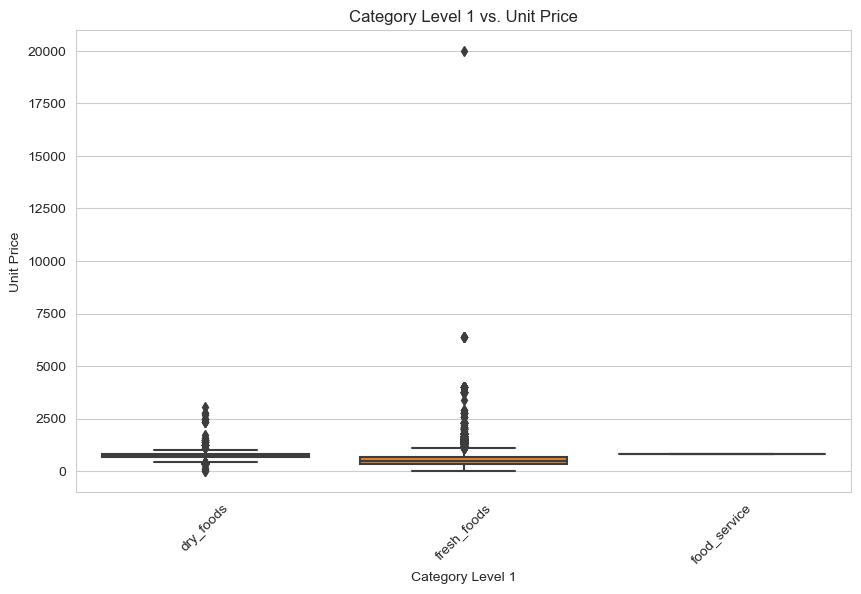

In [ ]:
# bi-variate analysis for 'rev_cate_level_1' and 'total_purchase'
plt.figure(figsize=(10, 6))
sns.boxplot(x='rev_cate_level_1', y='unit_price', data=input_df)
plt.title('Category Level 1 vs. Unit Price')
plt.xlabel('Category Level 1')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()


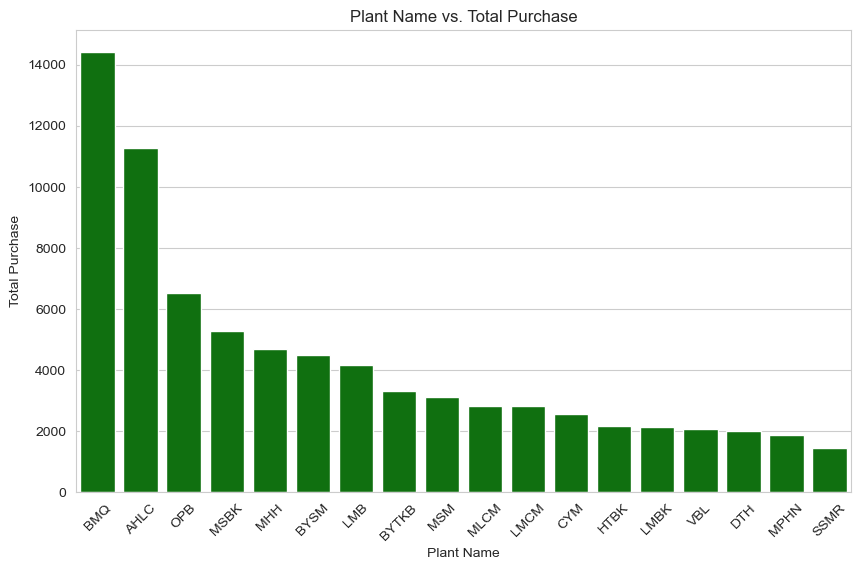

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='plant_name', y='total_purchase', data=input_df, ci=None, color='green', order=input_df.groupby('plant_name')['total_purchase'].mean().sort_values(ascending=False).index)
plt.title('Plant Name vs. Total Purchase')
plt.xlabel('Plant Name')
plt.ylabel('Total Purchase')
plt.xticks(rotation=45)
plt.show()

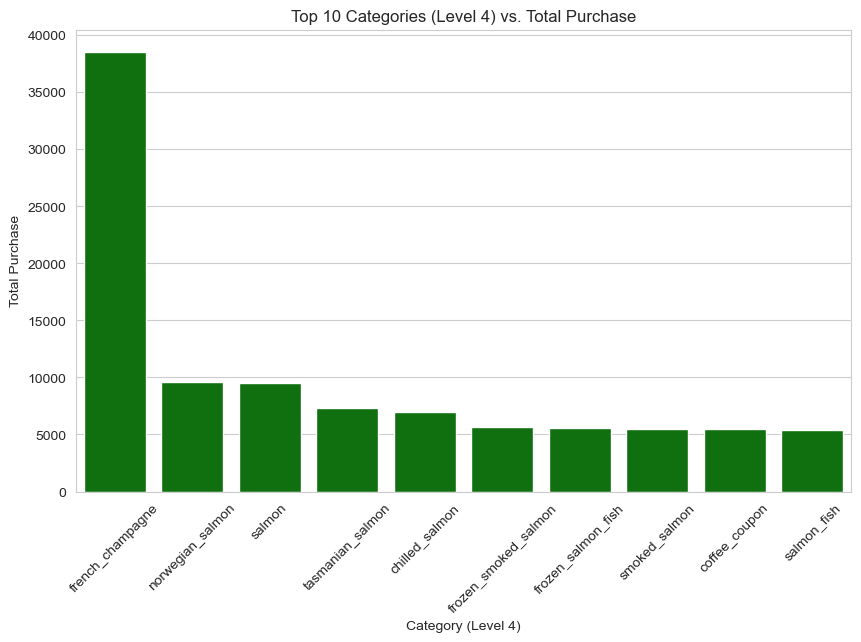

In [ ]:
# bi-variate analysis for top 10 'rev_cate_level_4' and 'total_purchase'
plt.figure(figsize=(10, 6))
sns.barplot(x='rev_cate_level_4', y='total_purchase', data=input_df, ci=None, color='green', order=input_df.groupby('rev_cate_level_4')['total_purchase'].mean().sort_values(ascending=False).index[:10])
plt.title('Top 10 Categories (Level 4) vs. Total Purchase')
plt.xlabel('Category (Level 4)')
plt.ylabel('Total Purchase')
plt.xticks(rotation=45)
plt.show()

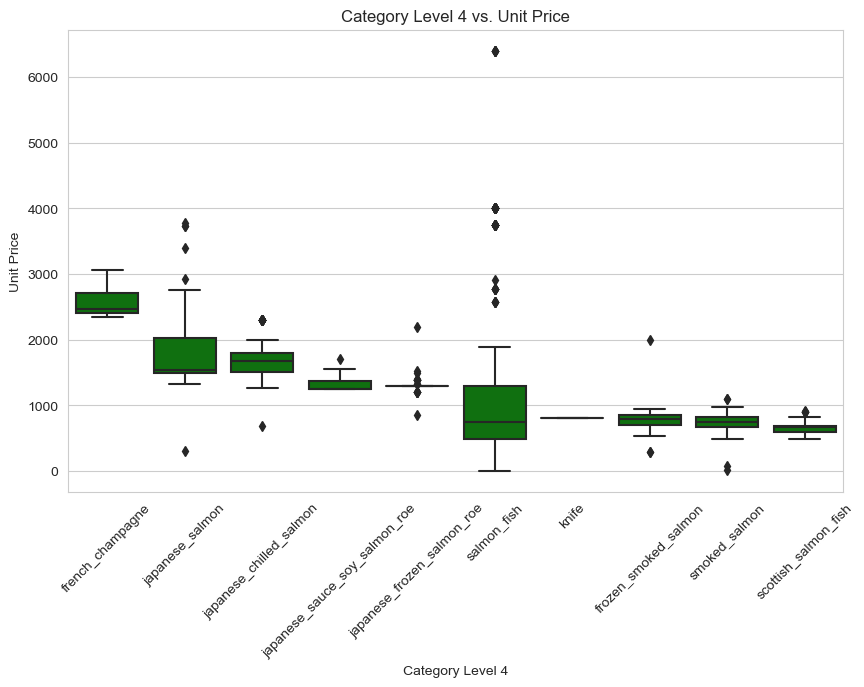

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rev_cate_level_4', y='unit_price', data=input_df, color='green', order=input_df.groupby('rev_cate_level_4')['unit_price'].mean().sort_values(ascending=False).index[:10])
plt.title('Category Level 4 vs. Unit Price')
plt.xlabel('Category Level 4')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
input_df.head()

,plant_name,po_number,rev_cate_level_1,rev_cate_level_2,rev_cate_level_3,rev_cate_level_4,rev_cate_level_5,item_desc,total_qty,unit,unit_price,total_purchase,generalized_supplier_name,month,year
0,SSMR,PO104124,dry_foods,seasoning_and_ingredient,preserved_food,scottish_salmon_fish,scottish_salmon_fish_smoked_sliced,salmon smoked : pre sliced (aw 1.3-1.6kg) [sco...,1.50,EA,590.0,696.2,food project (siam) co ltd (samui branch),5,2021
1,HTBK,BKKSU25437,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,proc seaf smoked salmon pre slice pc1kg ปลาแซล...,1.20,KG,770.0,924.0,siam food services limited | | 0000016633,5,2021
2,HTBK,BKKSU25539,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_presliced,proc seaf smoked salmon pre slice pc1kg ปลาแซล...,1.32,KG,770.0,1016.4,siam food services limited | | 0000016633,5,2021
3,LMBK,1KSTK00003047,fresh_foods,frozen_food,frozen_fish,frozen_salmon_fish,frozen_salmon_fish,salmon fillet skin on frozen (aw 1-1.2kg) /nor...,9.91,KG,380.0,3765.8,p.k.s production limited partnership,5,2021
4,LMBK,1KSTK00003047,dry_foods,seasoning_and_ingredient,preserved_food,smoked_salmon,smoked_salmon_sliced,fish salmon smoked sliced /kg,2.88,KG,490.0,1411.2,p.k.s production limited partnership,5,2021


There are 492641 words in the combination of all item_desc.


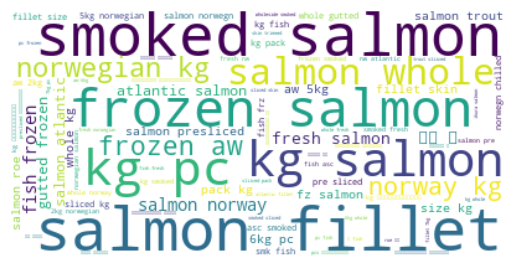

In [ ]:
# word cloud for 'item_desc' column
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # import the library
text = " ".join(desc for desc in input_df.item_desc) # join the words in the column
print ("There are {} words in the combination of all item_desc.".format(len(text))) # print the length of the text
stopwords = set(STOPWORDS) # set the stopwords
stopwords.update(["of", "the", "and", "in", "with", "for", "to", "or", "from", "on", "is", "are", "this", "that", "by", "as", "an", "be", "at", "it", "its", "which", "will", "can", "has", "have", "had", "was", "were", "been", "would", "could", "should", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j","k", "l", "m", "n", "o", "p", "q", "r", "s","t", "u", "v", "w", "x", "y", "z"]) # add the stopwords
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text) # create the wordcloud
plt.imshow(wordcloud, interpolation='bilinear') # plot the wordcloud
plt.axis("off") # remove the axis
plt.show() # show the plot

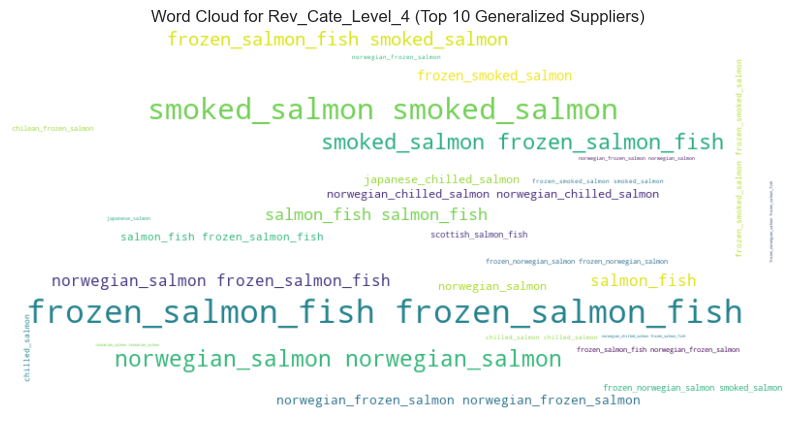

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter data for the top 10 generalized supplier names
top_suppliers = input_df['generalized_supplier_name'].value_counts().index[:10]
filtered_data = input_df[input_df['generalized_supplier_name'].isin(top_suppliers)]

# Combine 'rev_cate_level_4' for the top suppliers
combined_text = ' '.join(filtered_data['rev_cate_level_4'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Rev_Cate_Level_4 (Top 10 Generalized Suppliers)')
plt.show()

In [ ]:
smoked_salmon[smoked_salmon['year']<2023].shape

(1486, 18)

In [ ]:
smoked_salmon[smoked_salmon['year']==2023].shape

(563, 18)

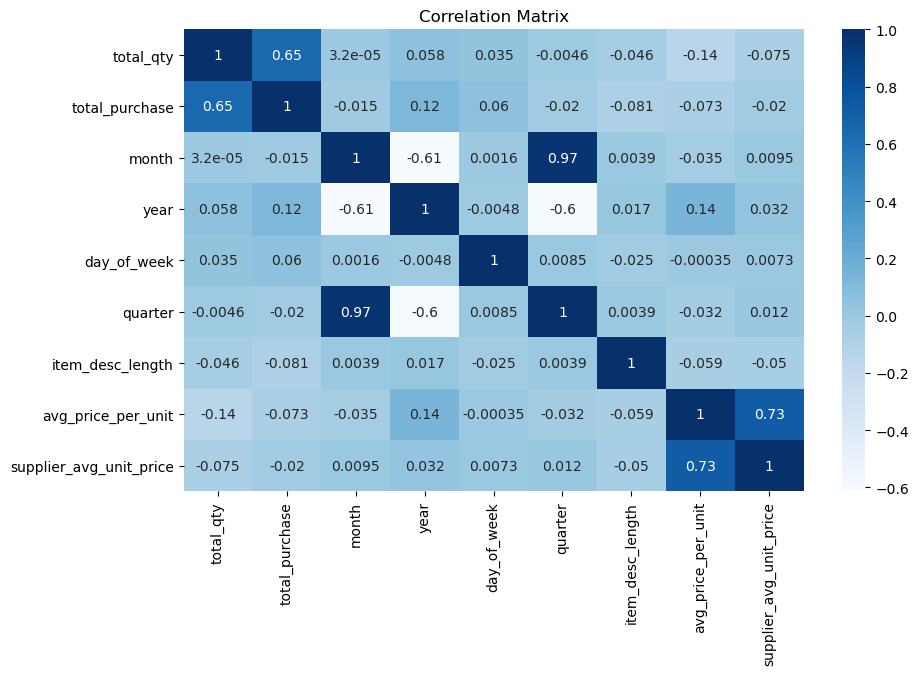

In [ ]:
# Drop the label column from the DataFrame before calculating the correlation matrix
label_column = 'unit_price'  # Replace with the actual name of your label column
numeric_columns = input_df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop(label_column)  # Exclude the label column
correlation_matrix = input_df[numeric_columns].corr()

# plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [1]:
# A correlation matrix is a table that shows the correlation coefficients between multiple variables.
# Each cell in the matrix represents the correlation between two variables. 
# Correlation coefficients measure the strength and direction of the linear relationship between variables. Here's how to read a correlation matrix:

# 1. **Range of Values**:
#    - Correlation coefficients range from -1 to 1.
#    - **-1**: Perfect negative correlation (as one variable increases, the other decreases by a constant proportion).
#    - **0**: No correlation (variables are not linearly related).
#    - **1**: Perfect positive correlation (as one variable increases, the other increases by a constant proportion).

# 2. **Direction of the Relationship**:
#    - Positive correlation: A positive value (closer to 1) indicates that as one variable increases, the other variable tends to increase as well.
#    - Negative correlation: A negative value (closer to -1) indicates that as one variable increases, the other variable tends to decrease.

# 3. **Strength of the Relationship**:
#    - The closer the correlation coefficient is to 1 or -1, the stronger the relationship.
#    - Values closer to 0 indicate weaker correlations.

# 4. **Diagonal Elements**:
#    - The diagonal elements of the matrix always have a correlation of 1 (perfect correlation with themselves).

# 5. **Interpreting Values**:
#    - 0.7 to 1.0: Strong positive correlation.
#    - 0.4 to 0.7: Moderate positive correlation.
#    - 0.2 to 0.4: Weak positive correlation.
#    - -0.2 to 0.2: Weak or no correlation.
#    - -0.4 to -0.2: Weak negative correlation.
#    - -0.7 to -0.4: Moderate negative correlation.
#    - -1.0 to -0.7: Strong negative correlation.

# 6. **Color Mapping**:
#    - Heatmaps are often used to visualize correlation matrices, with colors indicating the strength of the correlation.
# Lighter colors represent higher positive correlation, while darker colors represent higher negative correlation.

# 7. **Usefulness**:
#    - Correlation matrices are useful for identifying relationships between variables.
#    - High correlations between variables might indicate multicollinearity (when two or more independent variables are highly correlated),
#    which can impact regression models.

# When using a correlation matrix for feature selection or model building, consider factors like domain knowledge, context, 
# and the goals of your analysis. High correlations may not necessarily imply causation, 
# and other factors like data quality and outliers should also be considered.